In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'times new roman'

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [29]:
data_path = os.path.join('../data/billboard-spotify.csv')
df = pd.read_csv(data_path, encoding='latin1')
df = df.drop([], axis='columns')
df.head()

rank                                      song  \
0     1                               wooly bully   
1     2  i cant help myself sugar pie honey bunch   
2     3                i cant get no satisfaction   
3     4                       you were on my mind   
4     5              youve lost that lovin feelin   

                          artist  year  \
0  sam the sham and the pharaohs  1965   
1                      four tops  1965   
2             the rolling stones  1965   
3                        we five  1965   
4         the righteous brothers  1965   

                                              lyrics  acousticness  \
0  sam the sham miscellaneous wooly bully wooly b...        0.7130   
1   sugar pie honey bunch you know that i love yo...        0.2040   
2                                                           0.0348   
3   when i woke up this morning you were on my mi...        0.4850   
4   you never close your eyes anymore when i kiss...        0.5040   

   danceability  duration_ms  energy  explicit   ...    mode  popularity  \
0         0.582     140867.0   0.575       0.0   ...     1.0        51.0   
1         0.686     163680.0   0.714       0.0   ...     1.0        63.0   
2         0.725     222813.0   0.853       0.0   ...     1.0        68.0   
3         0.510     155960.0   0.565       0.0   ...     0.0        35.0   
4         0.390     225227.0   0.309       0.0   ...     1.0        57.0   

   release_date  speechiness  \
0    1987-08-04       0.0529   
1    2008-01-01       0.0287   
2    1965-07-30       0.0353   
3    2010-01-01       0.0500   
4          1990       0.0265   

                                  spotify_album_name  \
0  Full Metal Jacket (Original Motion Picture Sou...   
1                          The Definitive Collection   
2                      Out Of Our Heads (Remastered)   
3                                You Were On My Mind   
4  The Very Best Of The Righteous Brothers - Unch...   

                spotify_artist  \
0  Sam The Sham & The Pharaohs   
1                    Four Tops   
2           The Rolling Stones   
3                      We Five   
4       The Righteous Brothers   

                                        spotify_name    tempo time_signature  \
0                                        Wooly Bully  140.601            4.0   
1       I Can't Help Myself (Sugar Pie, Honey Bunch)  126.736            4.0   
2  (I Can't Get No) Satisfaction - Mono Version /...  136.282            4.0   
3                                You Were On My Mind  143.381            4.0   
4                    You've Lost That Lovin' Feelin'   94.444            4.0   

  valence  
0   0.558  
1   0.964  
2   0.904  
3   0.700  
4   0.459  

[5 rows x 24 columns]

# Artist diversity by year
There appears to be a slight downward trend of number of unique artists over time, though it is hard to say given the relatively few data points. 

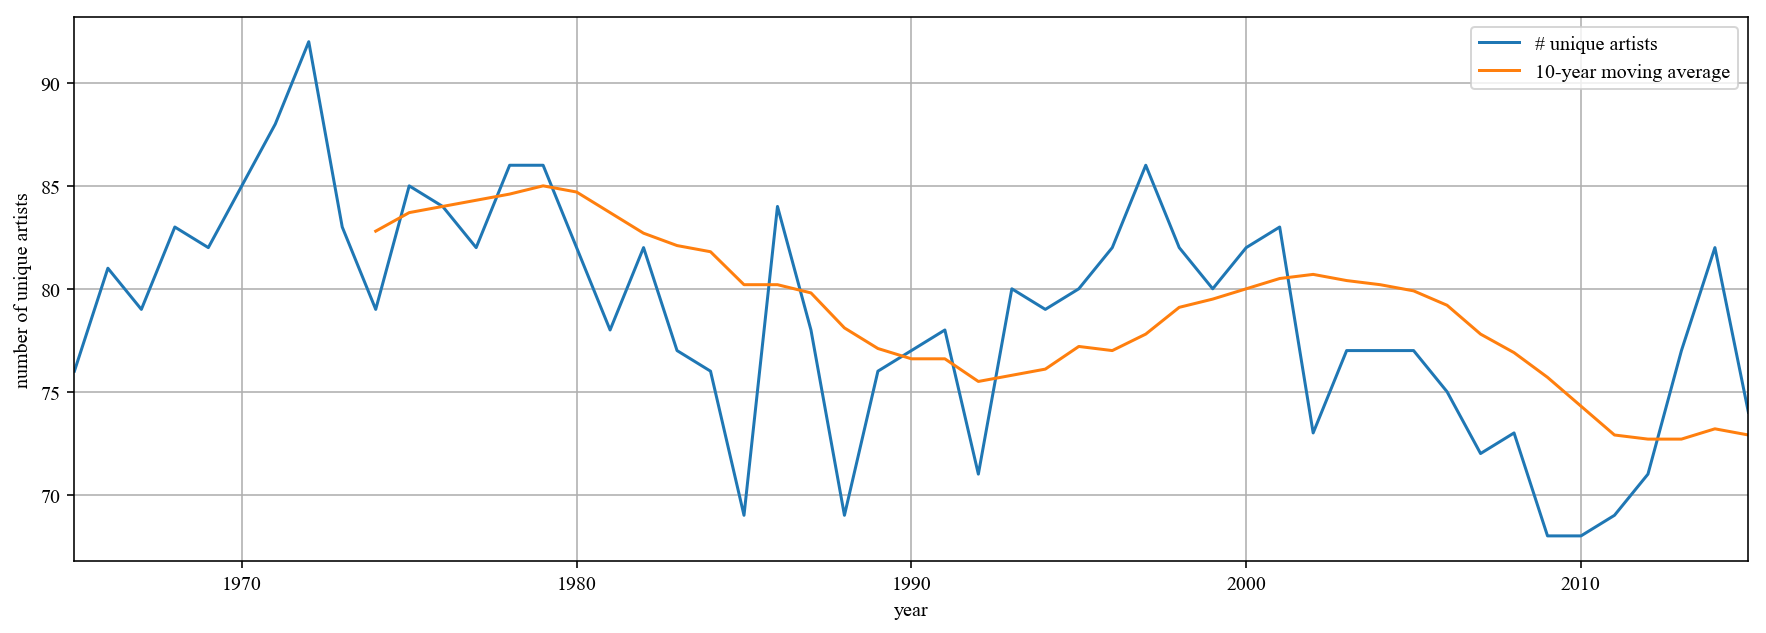

In [30]:
# remove all featured artists, leave only primary artist
df['artist_base'] = df['artist'].apply(lambda x: re.sub("\s\(*feat.*", '', x))
nunique_artists_year = df.groupby(['year'])['artist_base'].agg(pd.Series.nunique)
ax = nunique_artists_year.plot.line(figsize = (15,5), grid=True, label='# unique artists')
ax.set(ylabel = 'number of unique artists')
nunique_artists_year.rolling(window=10).mean().plot(grid=True, label='10-year moving average')
plt.legend()

Below are the artists with the most singles on the Billboard Top 100 over the dataset's 50 year span. It is important to note that if the same single appears in the top 100 of different years, it is double counted.

[Text(0,0.5,'# songs in top 100'), Text(0.5,0,'artist')]

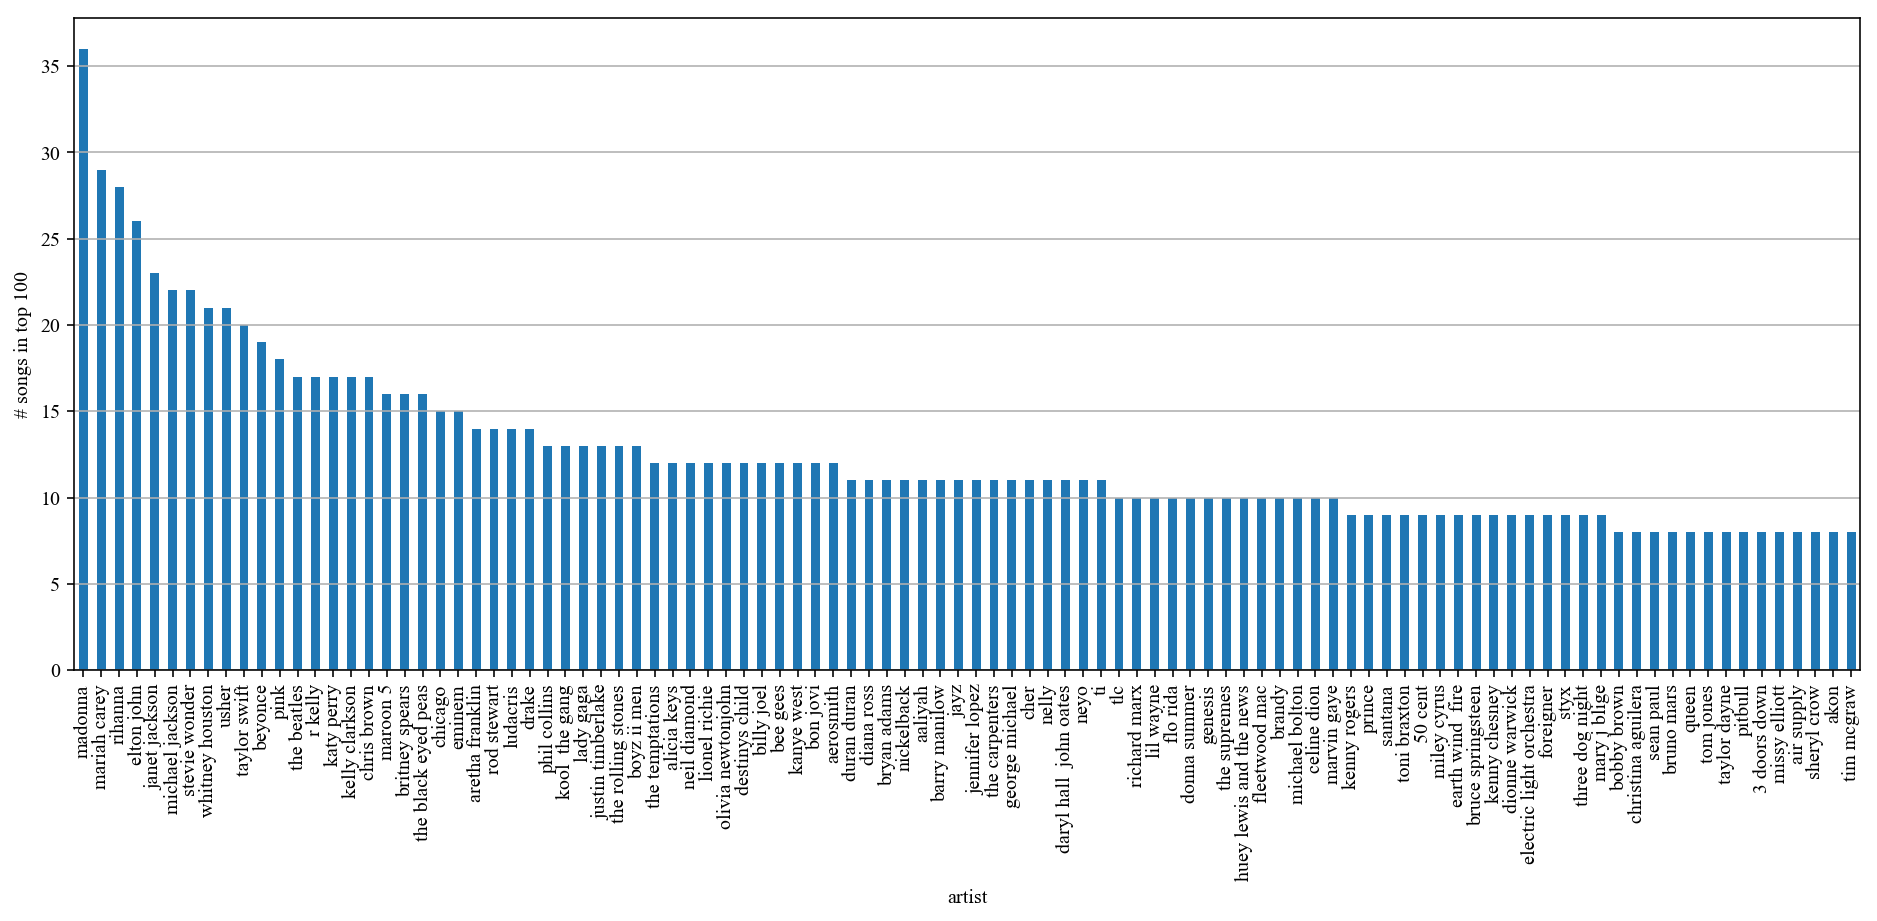

In [31]:
ax = df['artist_base'].value_counts().head(100).plot.bar(figsize=(16,6))
ax.yaxis.grid(True)
ax.set(xlabel='artist', ylabel='# songs in top 100')

The following plot displays artists sorted by longevity, defined as the number of years between the earliest and latest single that appears on the Top 100.

[Text(0,0.5,'# years between earliest and latest top 100 single'),
 Text(0.5,0,'artist')]

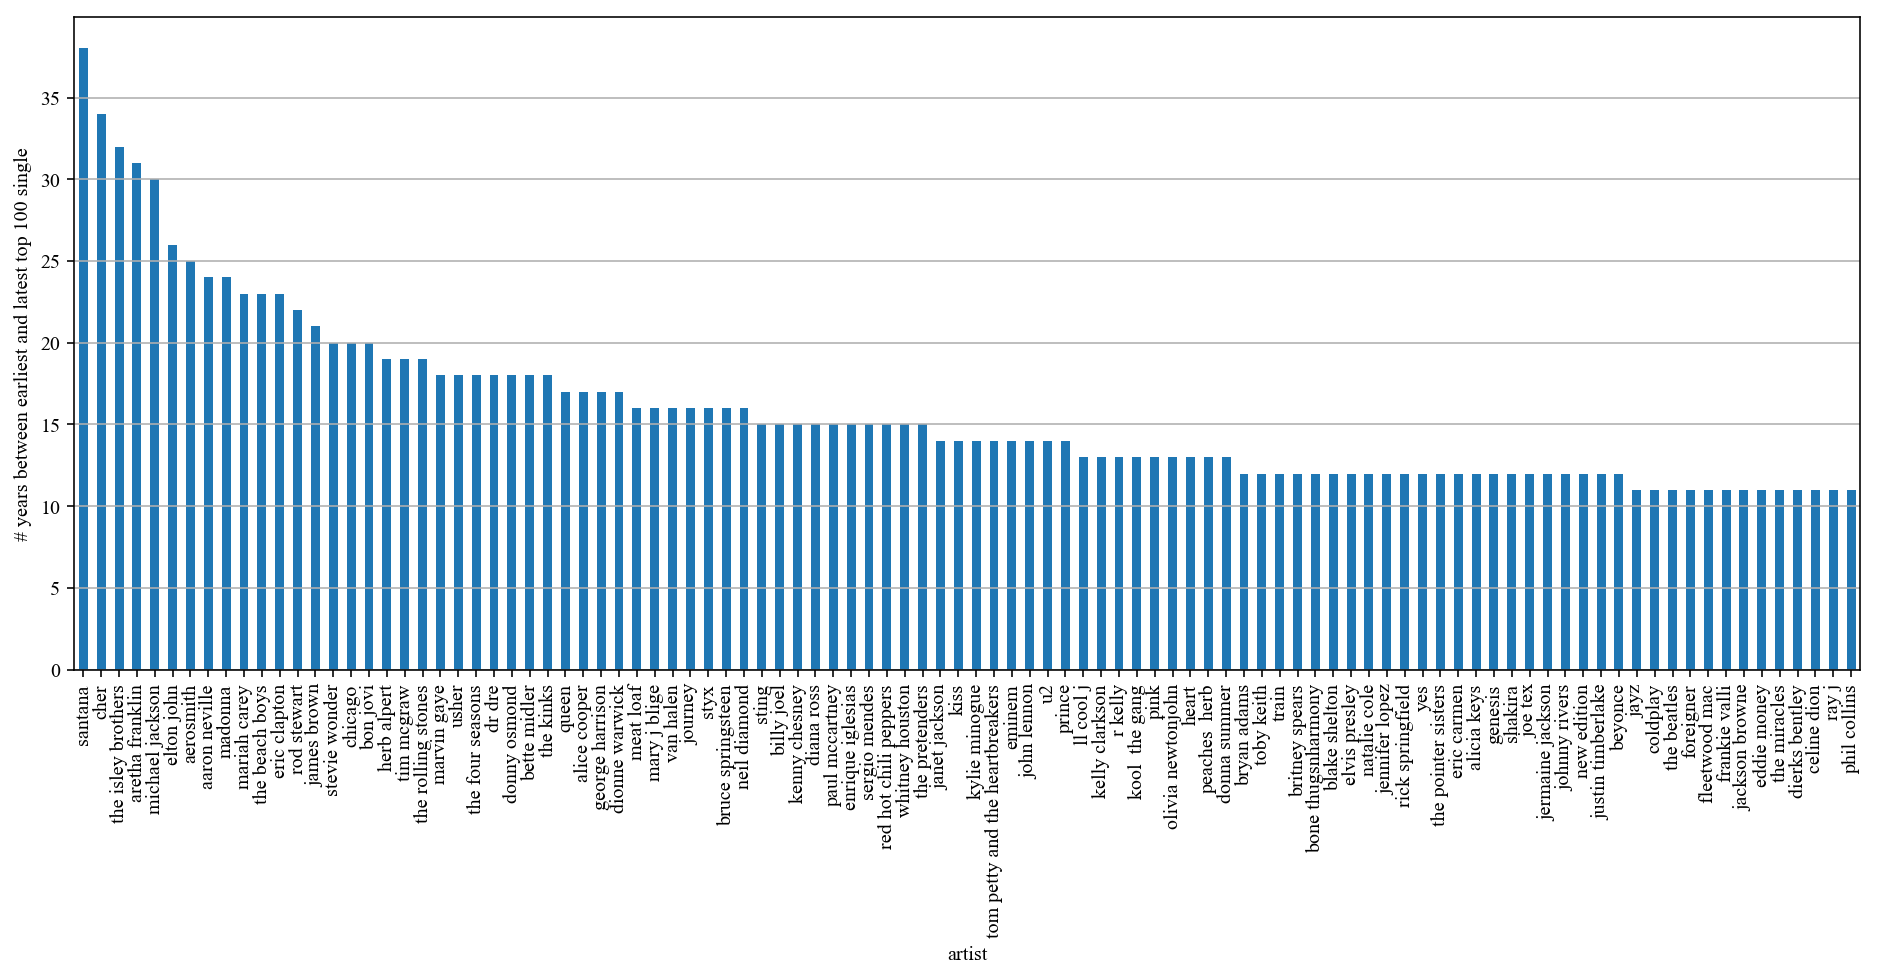

In [32]:
plt.figure(figsize=(16,6))
ax = df.groupby(['artist_base'])['year'].agg(np.ptp).sort_values(ascending=False).head(100).plot.bar()
ax.yaxis.grid(True)
ax.set(xlabel='artist', ylabel='# years between earliest and latest top 100 single')

# Verbosity over time
The average number of words per second for top 100 singles has ticked up over time and stabilized. This shift could be explained by the growing popularity of rap/hip-hop.

In [33]:
num_words = df['lyrics'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
df['words_per_sec'] = num_words / (df['duration_ms'] / 1000)

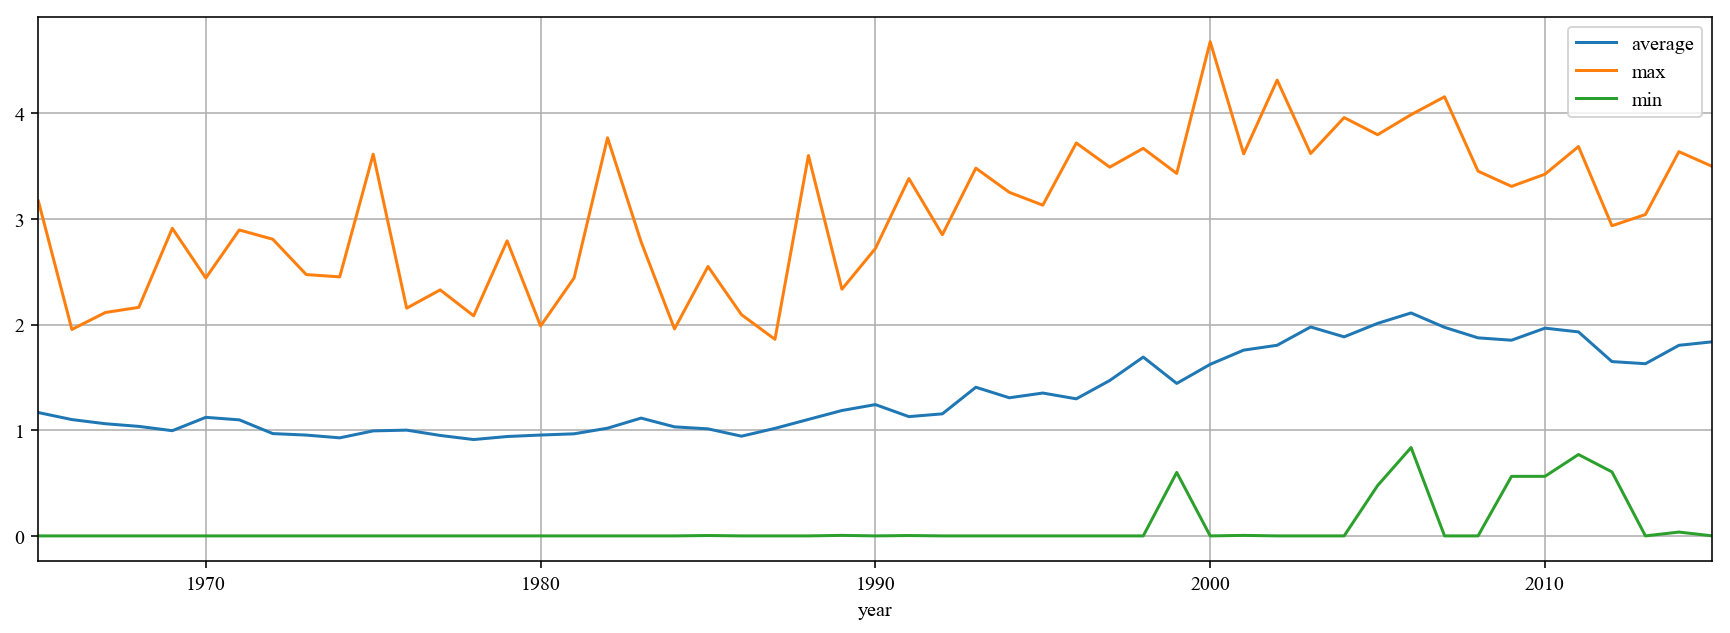

In [34]:
avg_wps_by_year = df.groupby(['year'])['words_per_sec'].mean()
max_wps_by_year = df.groupby(['year'])['words_per_sec'].max()
min_wps_by_year = df.groupby(['year'])['words_per_sec'].min()

ax = avg_wps_by_year.plot.line(grid=True, figsize=(15,5), label='average')
max_wps_by_year.plot.line(ax=ax, grid=True, figsize=(15,5), label='max')
min_wps_by_year.plot.line(ax=ax, grid=True, figsize=(15,5), label='min')
ax.legend()

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


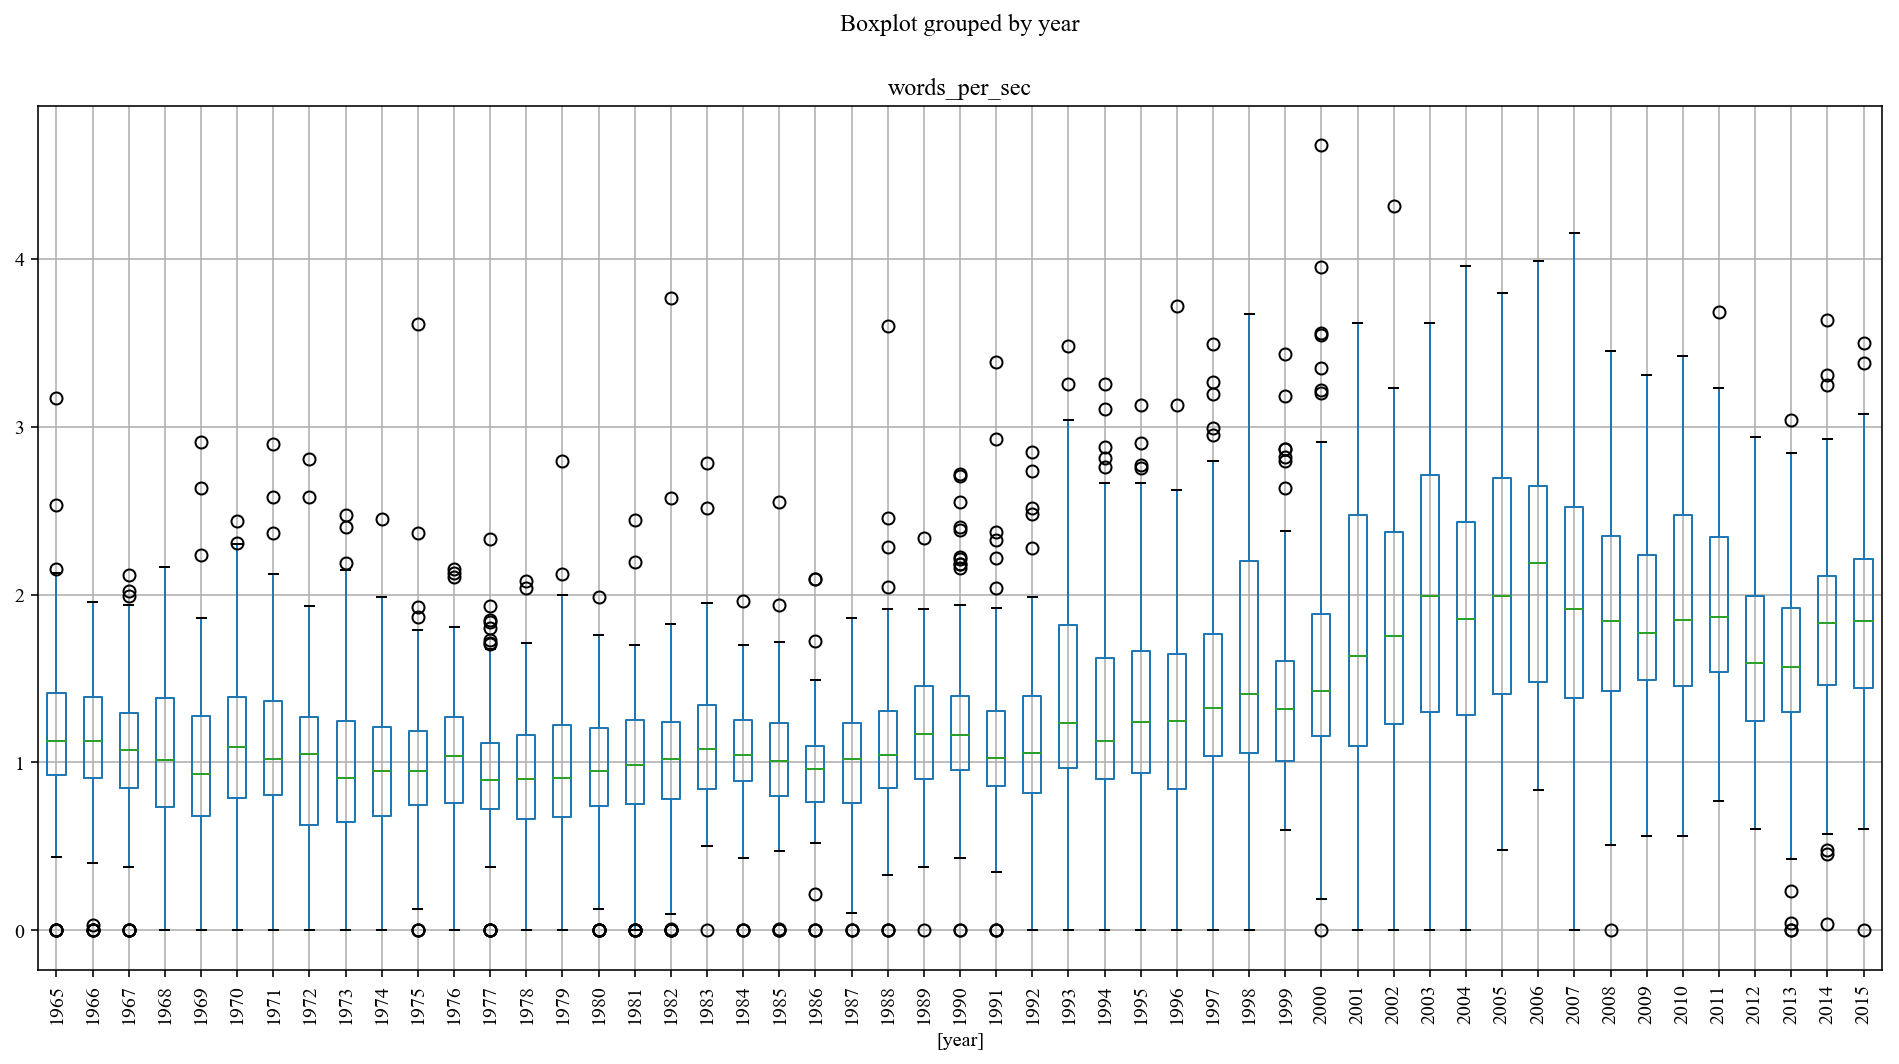

In [35]:
ax = df[['year','words_per_sec']].boxplot(by='year', figsize=(16,8), rot = 90)

### Most verbose artists

[Text(0,0.5,'average words_per_sec'), Text(0.5,0,'artist')]

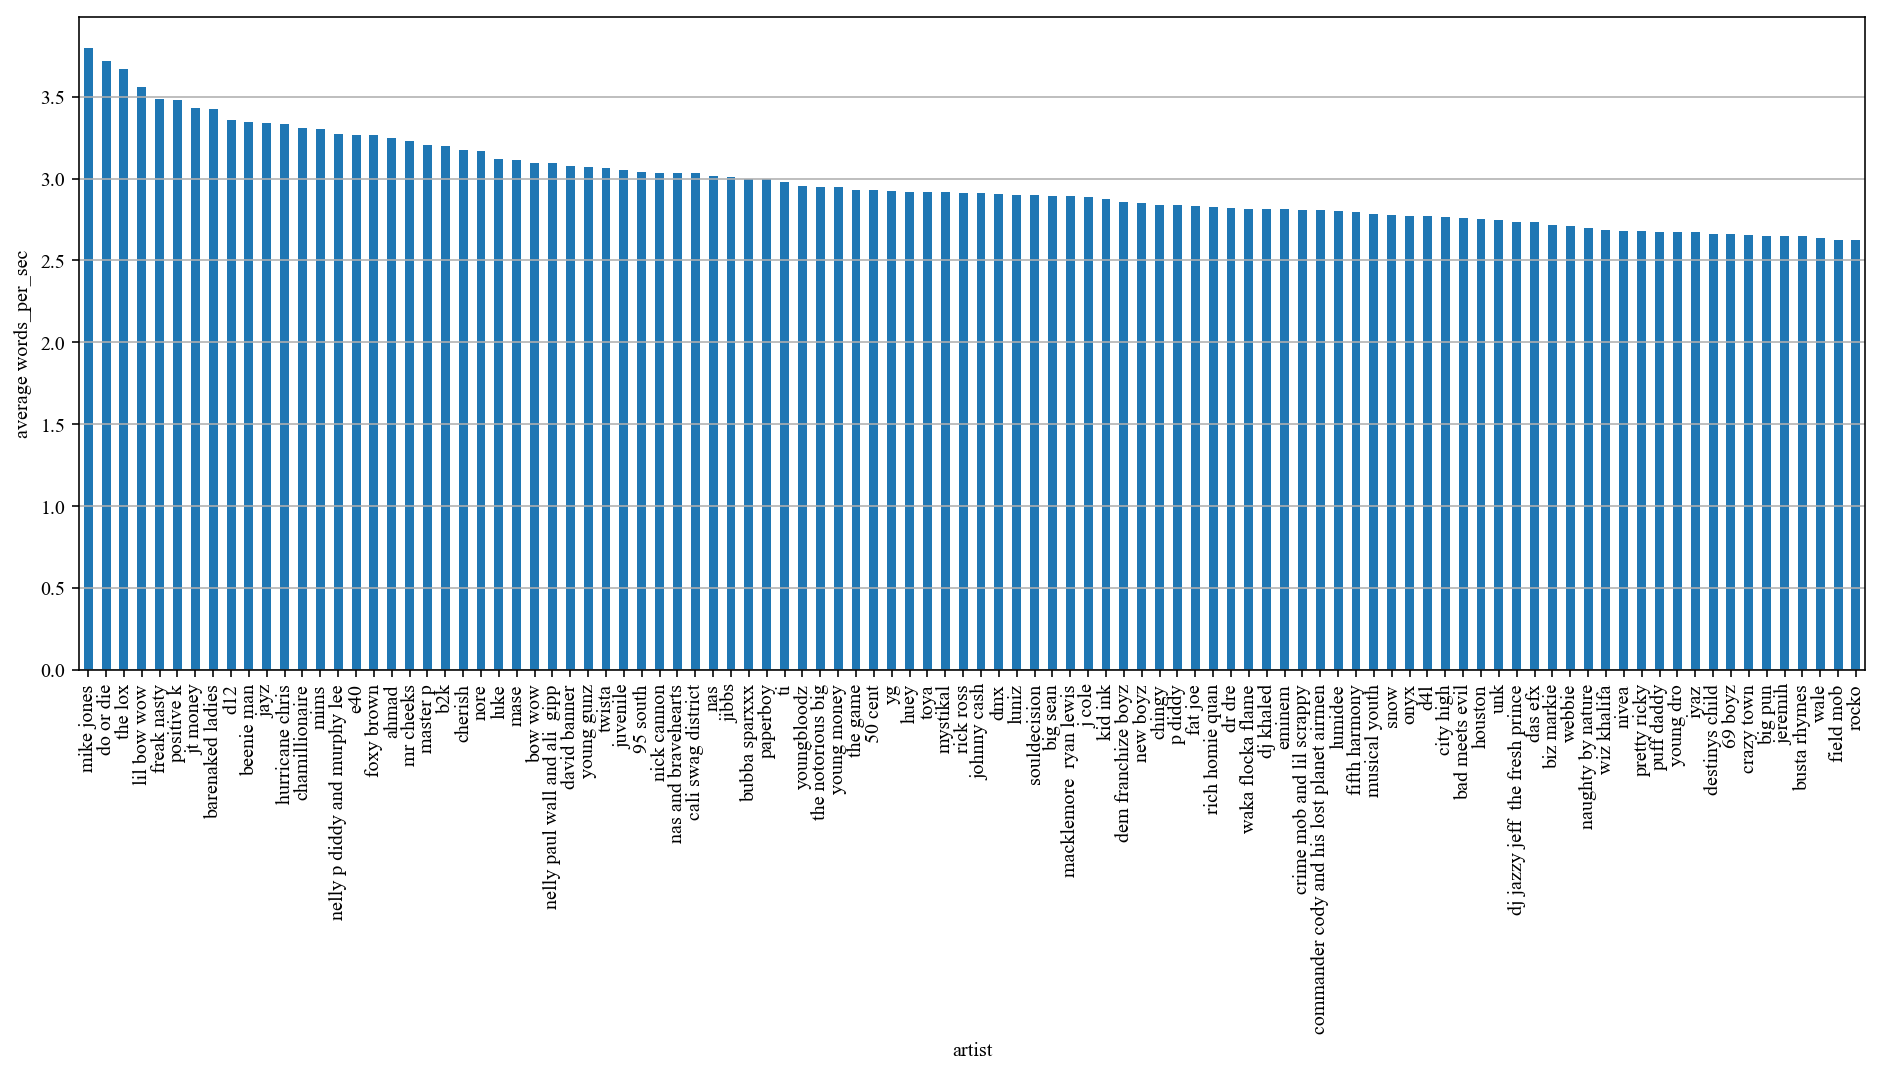

In [36]:
plt.figure(figsize=(16,6))
ax = df.groupby(['artist_base'])['words_per_sec'].mean().sort_values(ascending=False).head(100).plot.bar()
ax.yaxis.grid(True)
ax.set(xlabel='artist', ylabel='average words_per_sec')

# Collaboration over time
A collaboration is counted when the "artist" value for a track includes additional information of the form "featuring/feat. blah blah blah." The increase in collaborations over time makes sense given that the music industry is shrinking, and more artists are forced to work together to generate sufficient star-power wattage for their music. The increase in popularity of EDM and the practice of remixing other artists' work may also account for the observed trend.

[Text(0,0.5,'number of songs with second artist')]

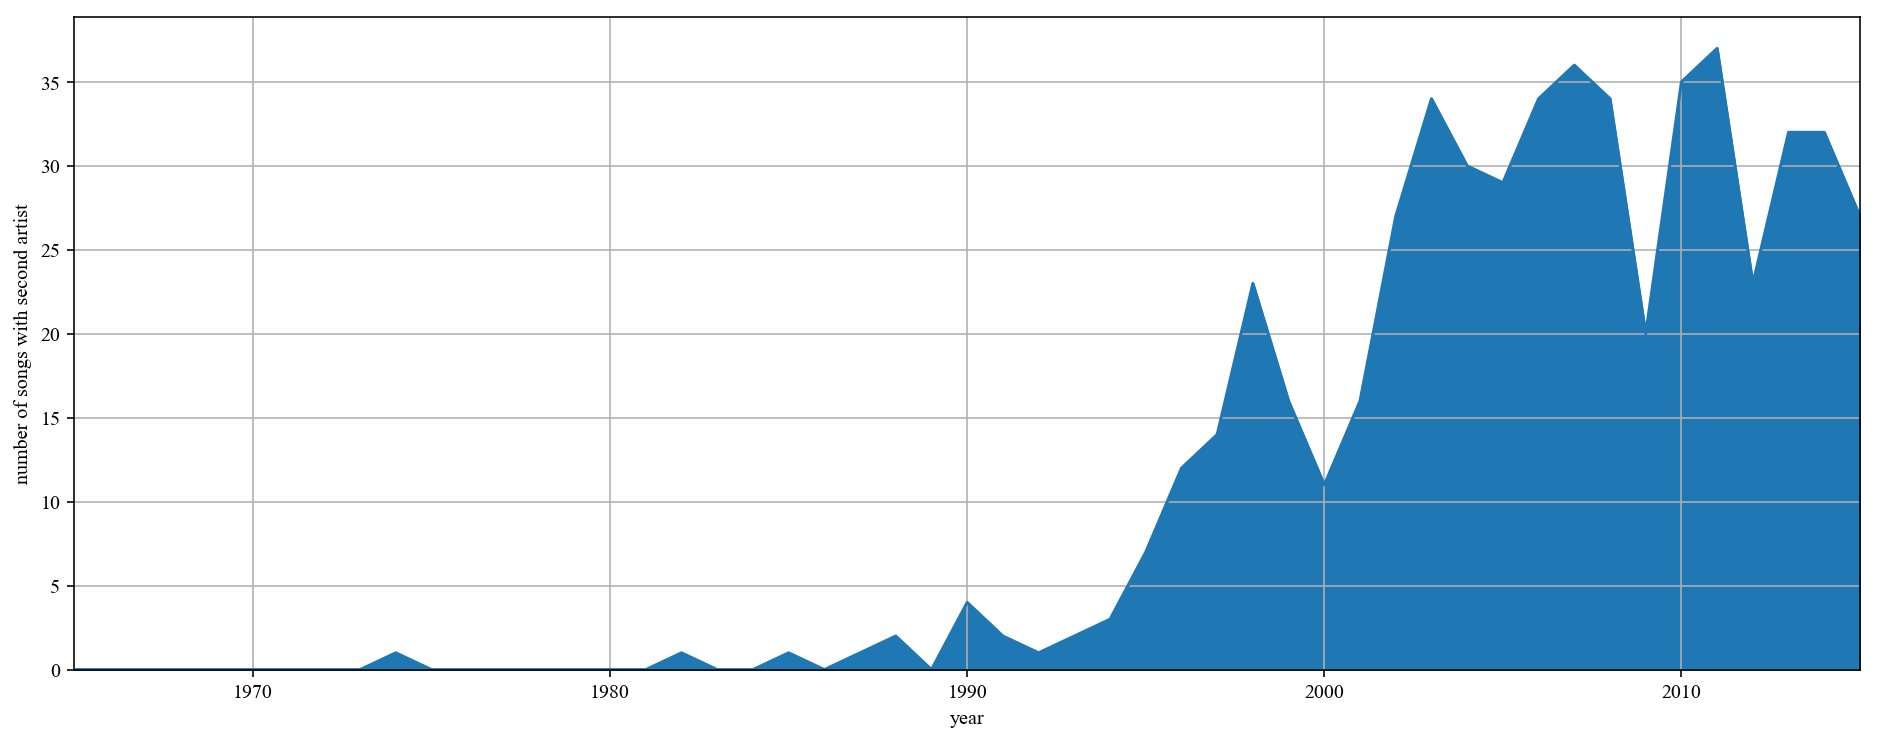

In [20]:
df_collab = df[df['artist'].str.contains('feat')]
df_collab = df_collab.groupby(['year'])['artist'].count().reindex(range(1965, 2016))
df_collab = df_collab.fillna(0)
ax = df_collab.plot.area(figsize=(16,6), grid=True)
ax.set(ylabel = 'number of songs with second artist')

### Most collaborative artists

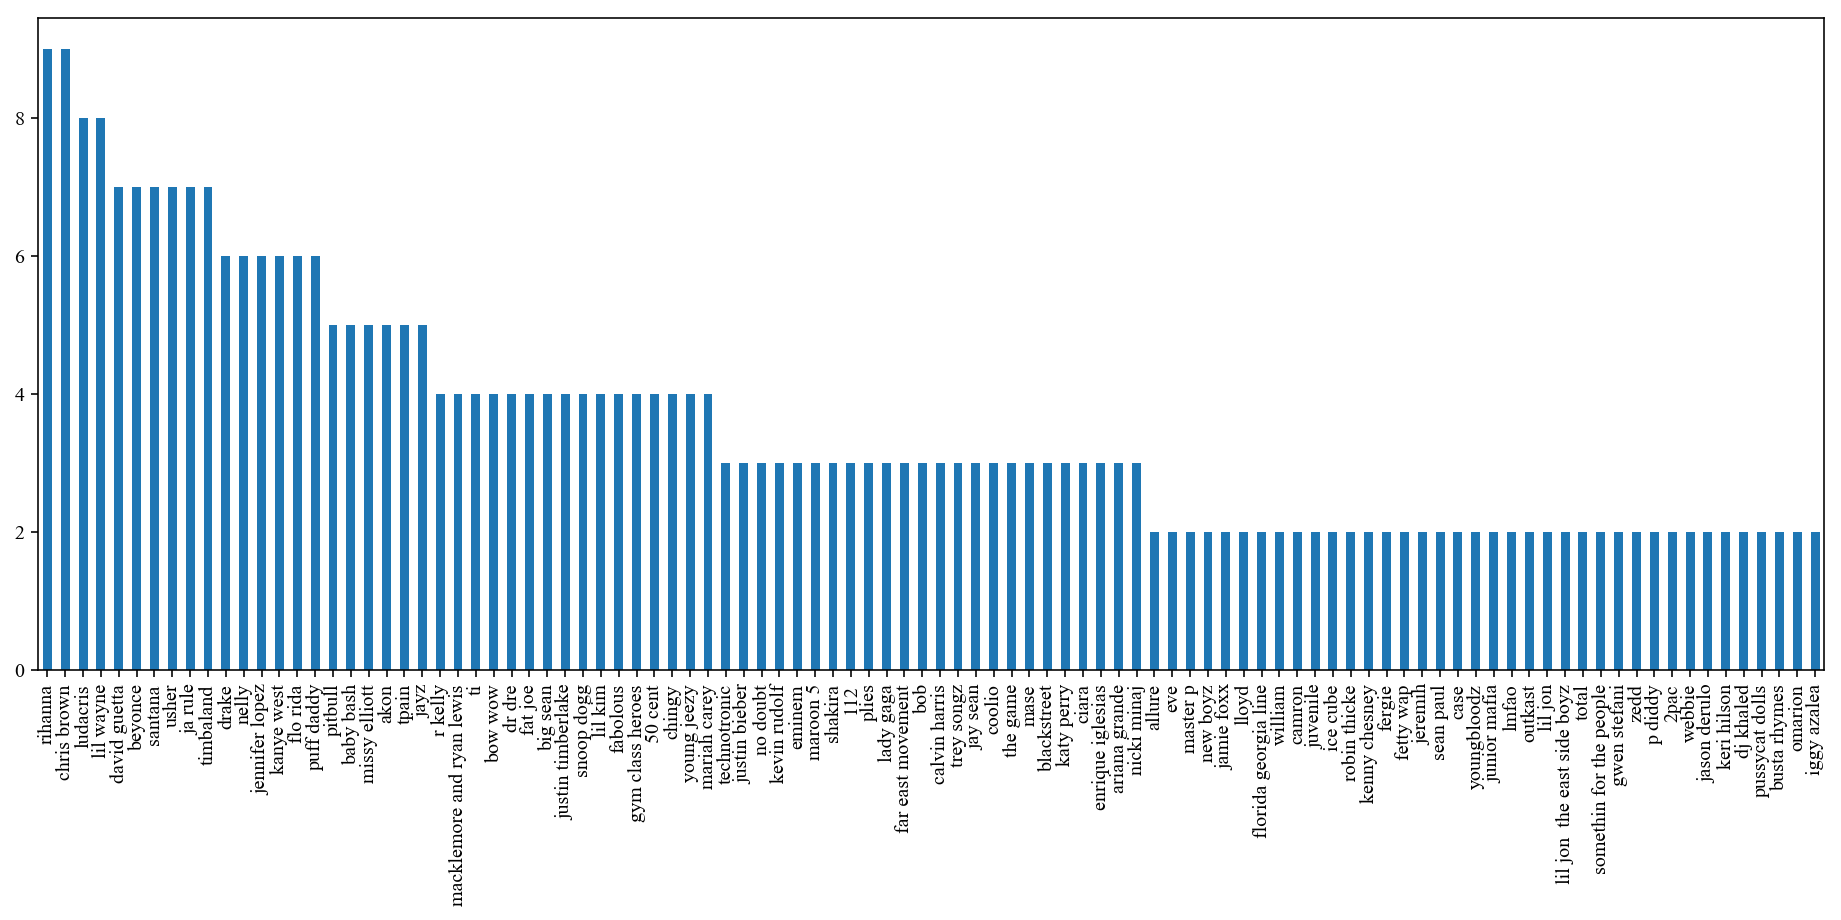

In [27]:
df_collab = df[df['artist'].str.contains('feat')]
df_collab['artist_base'].value_counts().head(100).plot.bar(figsize=(16,6))

# Parallel coordinates 
Parallel coordinate plots are displayed for all songs. On the whole, they do not seem to reveal much.

In [180]:
def zero_one_scaler(x):
    return (x - x.min()) / np.ptp(x)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


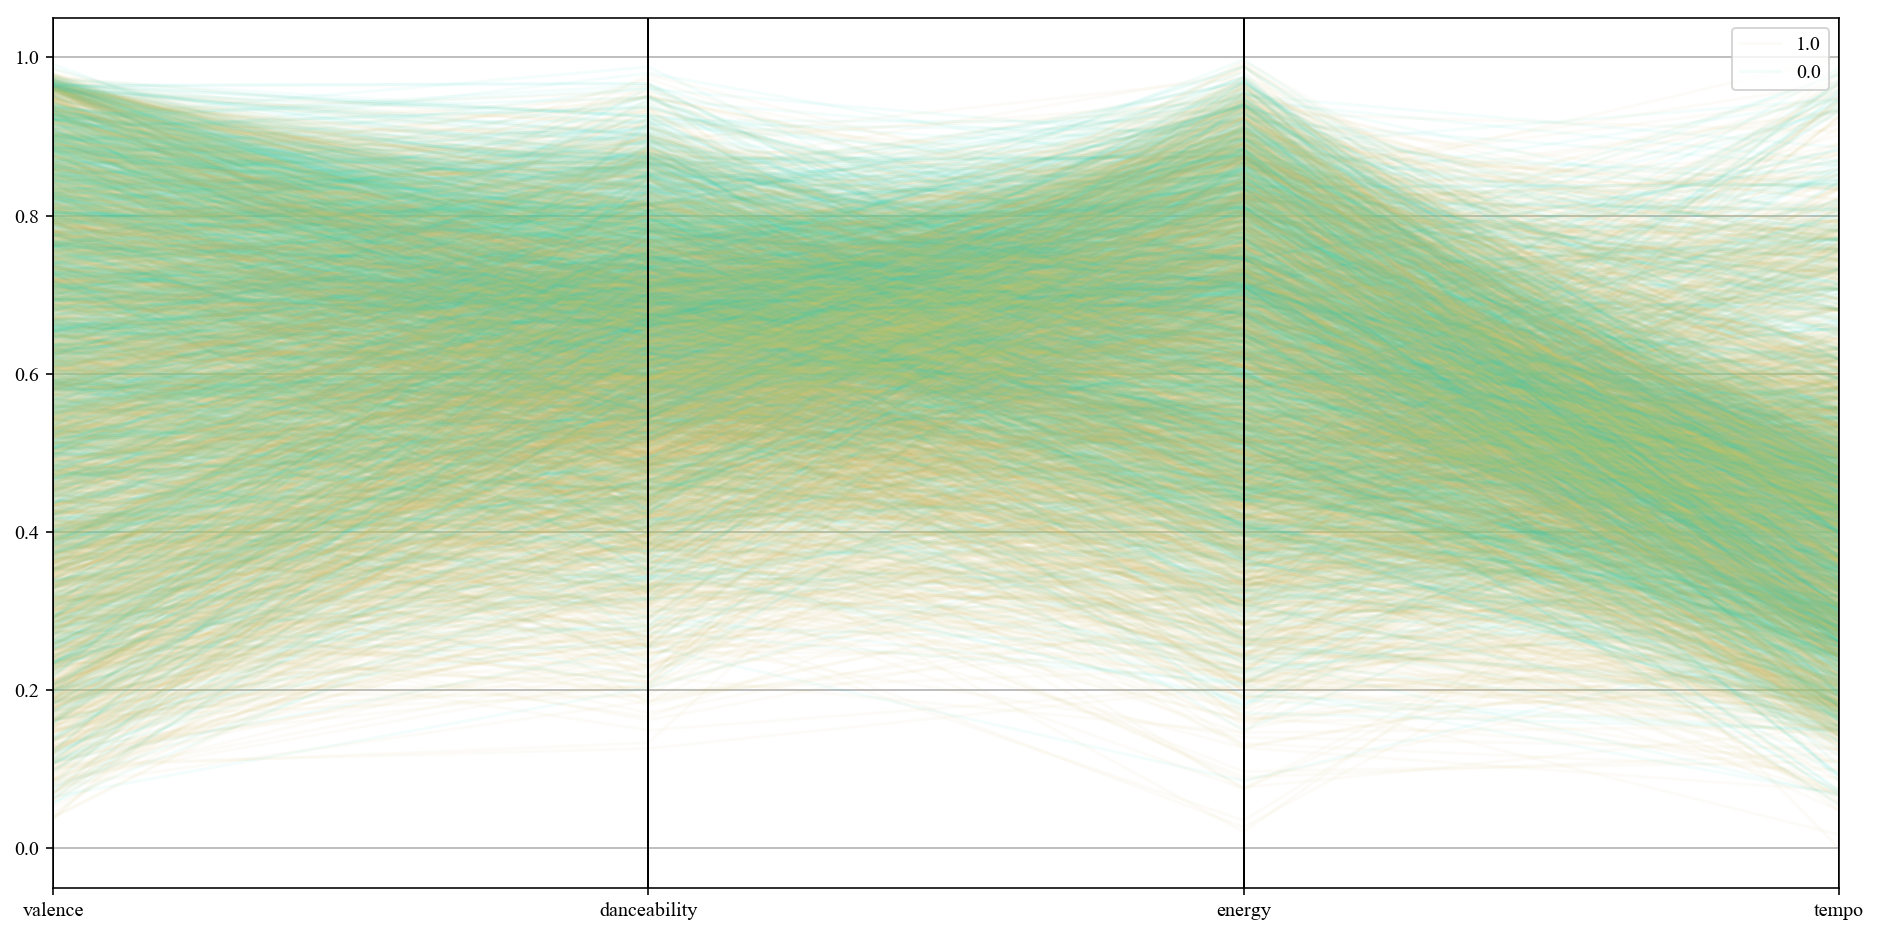

In [183]:
plt.figure(figsize=(16,8))
df_parcoords = df.loc[~np.any(df.isnull(), axis=1),:]
df_parcoords['tempo'] = zero_one_scaler(df_parcoords['tempo'])
columns = ['valence','danceability', 'energy', 'tempo']
ax = pd.plotting.parallel_coordinates(df_parcoords,
                                     'mode',
                                     columns,
                                     alpha=0.05)


/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


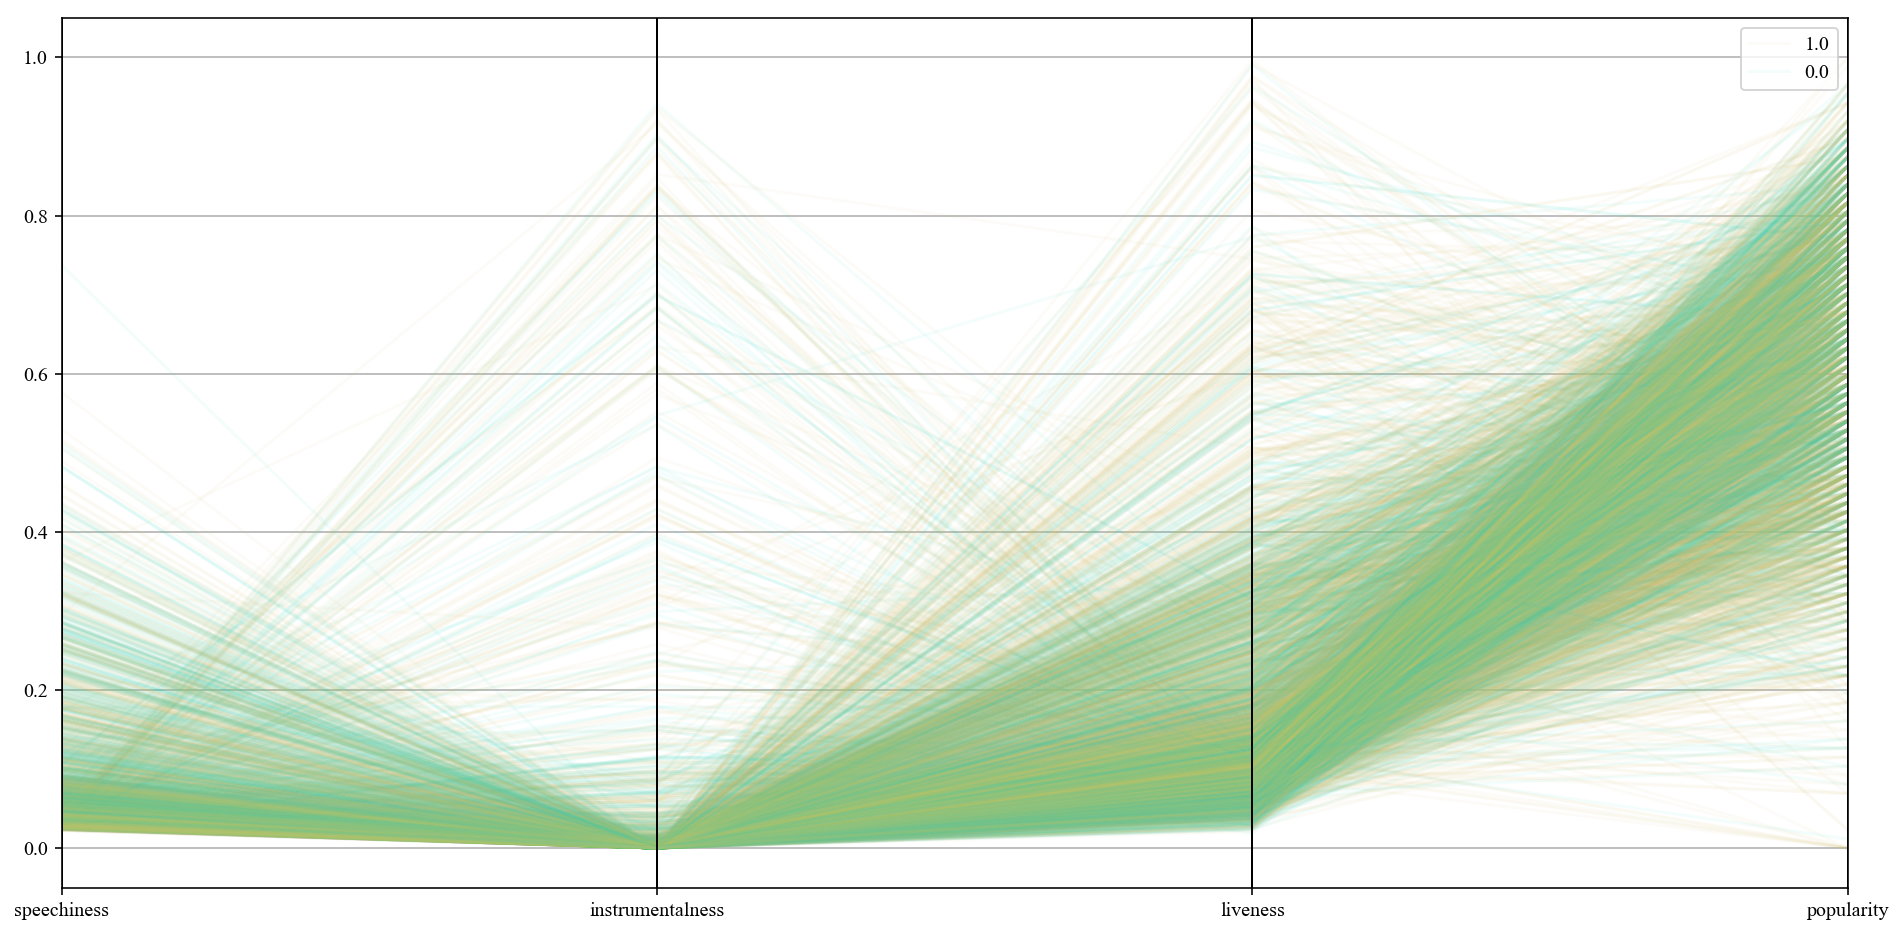

In [188]:
plt.figure(figsize=(16,8))
columns = ['speechiness', 'instrumentalness', 'liveness', 'popularity']
df_parcoords['popularity'] = zero_one_scaler(df['popularity'])
ax = pd.plotting.parallel_coordinates(df_parcoords,
                                     'mode',
                                     columns,
                                     alpha=0.05)

The dendrogrammed correlation heatmap reveals some interesting aspects of the data's correlation structure.
- Popularity and year are weakly correlated. This makes intuitive sense given that the audience on Spotify are more likely to listen to more current music and that people who would enjoy the oldies probably don't even know what Spotify is.
- Loudness and year are also weakly correlated. This will be commented on in the "Misc" section.
- Loudness and energy are moderately correlated.
- Acousticness and energy are weakly anticorrelated. This could be explained by the fact that ballads and other slow music are more likely to feature acoustic instruments.
- Valance and danceability are weakly correlated. No one wants to dance to sad/angry music. But what about EDM? Might be worth investigating if this correlation holds over time.
- Words per second is weakly correlated with speechiness. Indeed, it's easier to talk fast than to sing fast.

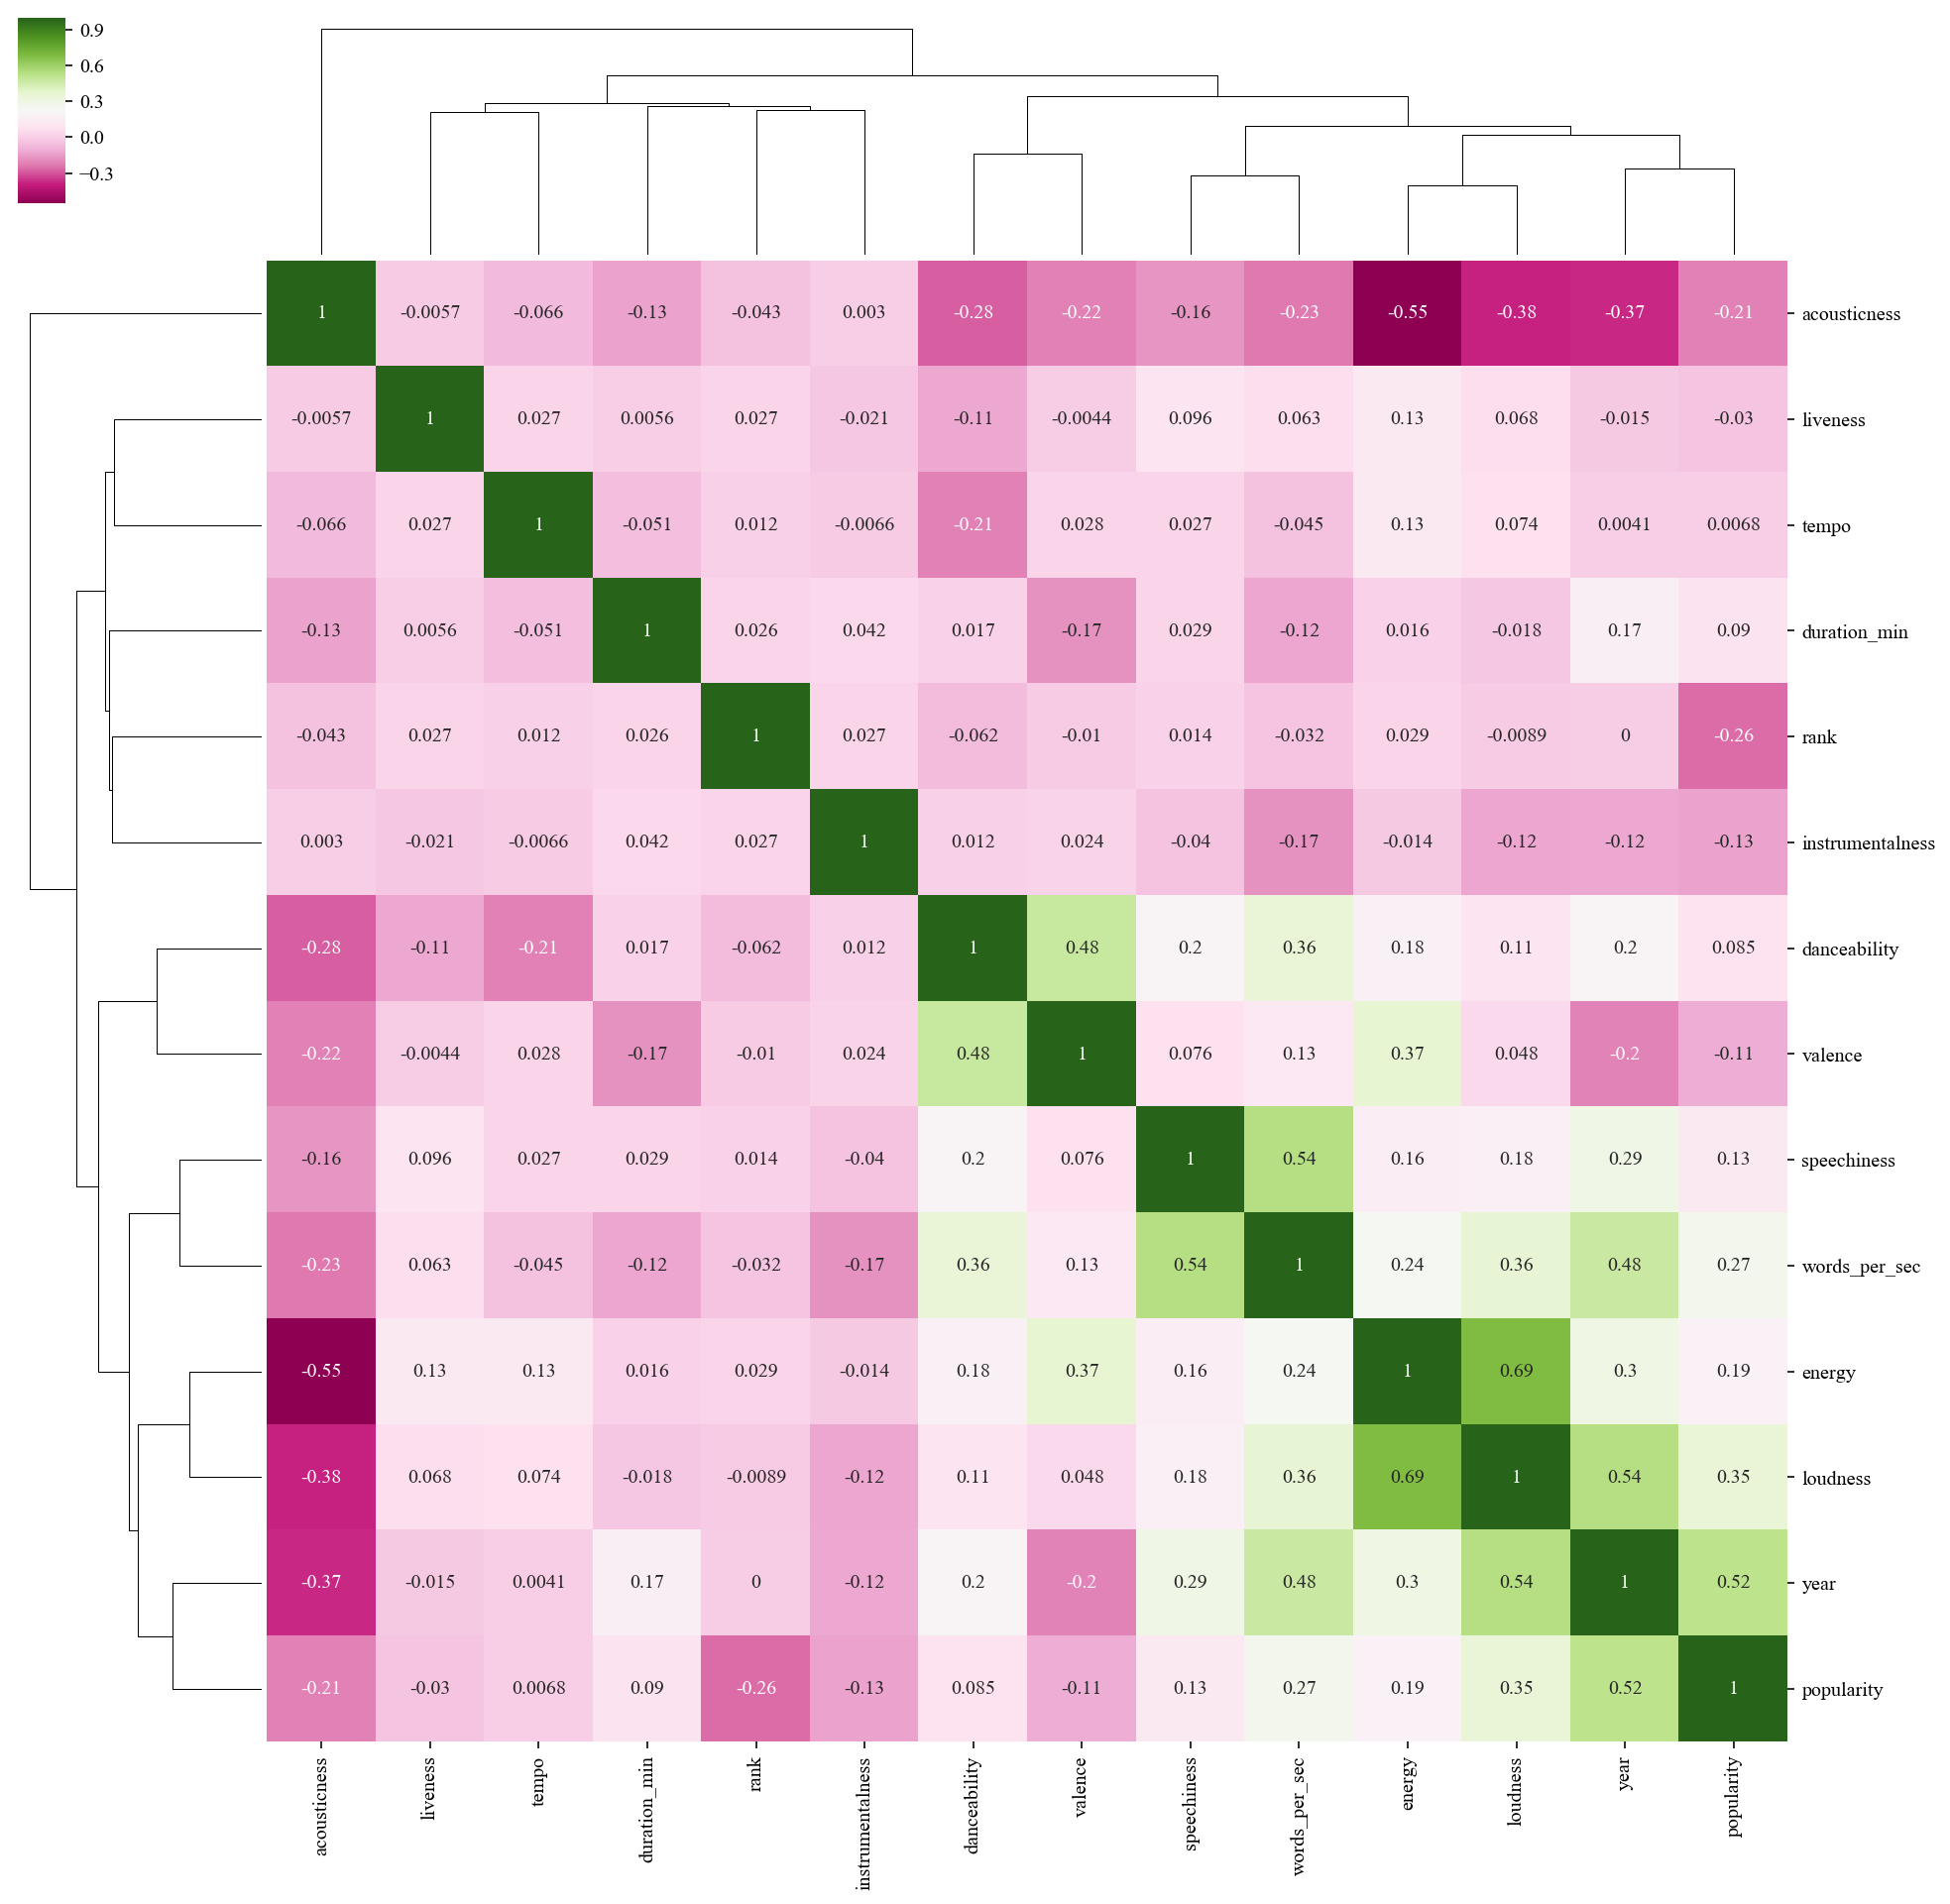

In [39]:
columns = ['rank', 'year', 'acousticness', 'danceability', 'duration_min', 'energy', 'instrumentalness',
           'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'words_per_sec']
df_scatter = df[columns]
sns.clustermap(df_scatter.corr(), cmap='PiYG', annot=True, figsize=(16,16))

# Misc 

While there doesn't appear to be any significant trend in median song length over time, it does appear that variability of song length has decreased over time as radio stations enforce stricter standards on duration and our attention spans get shorter.

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


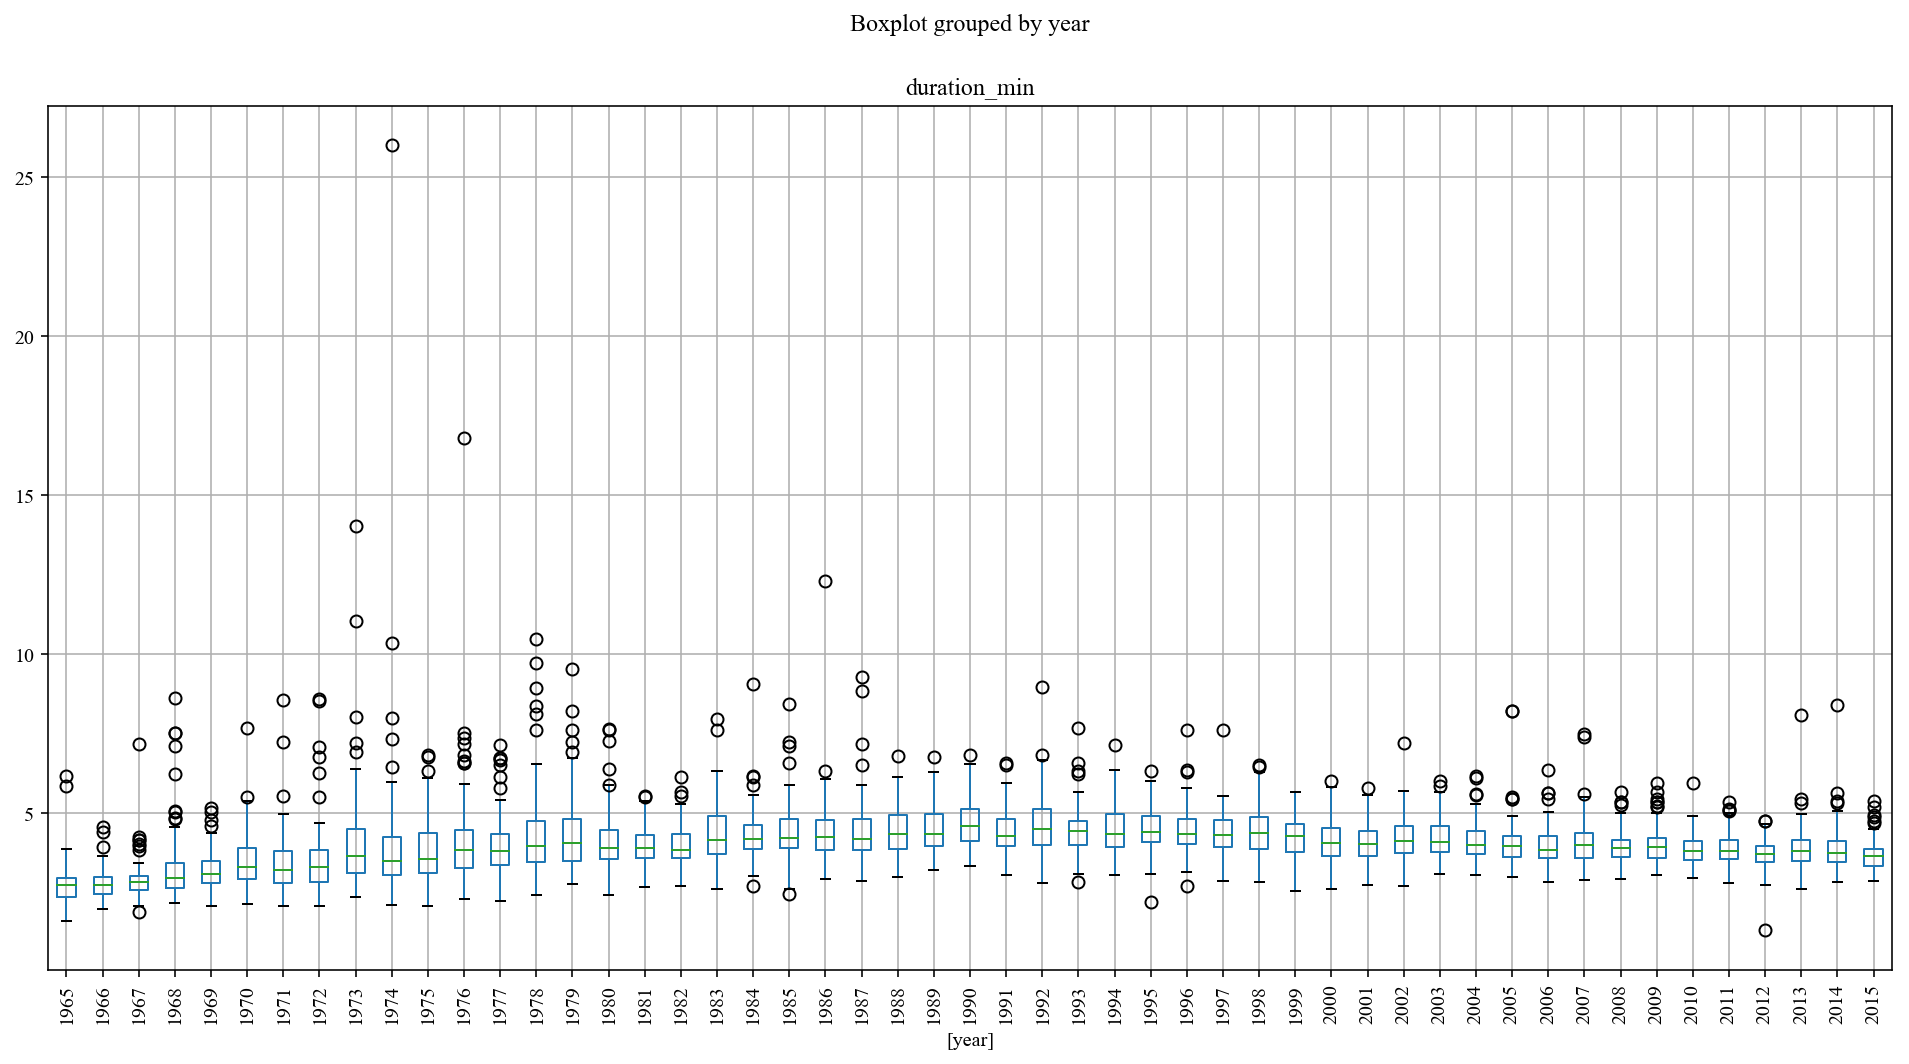

In [38]:
df['duration_min'] = df['duration_ms'] / 1000 / 60
ax = df[['year','duration_min']].boxplot(by='year', figsize=(16,8), rot = 90)

With the advent of synthesizers and electronic music, it is no surprise that the acousticness of popular music has sharpy declined over the years. The 80's is famous for the popularity of synthesized music, and we may be in another electronic music cycle.

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


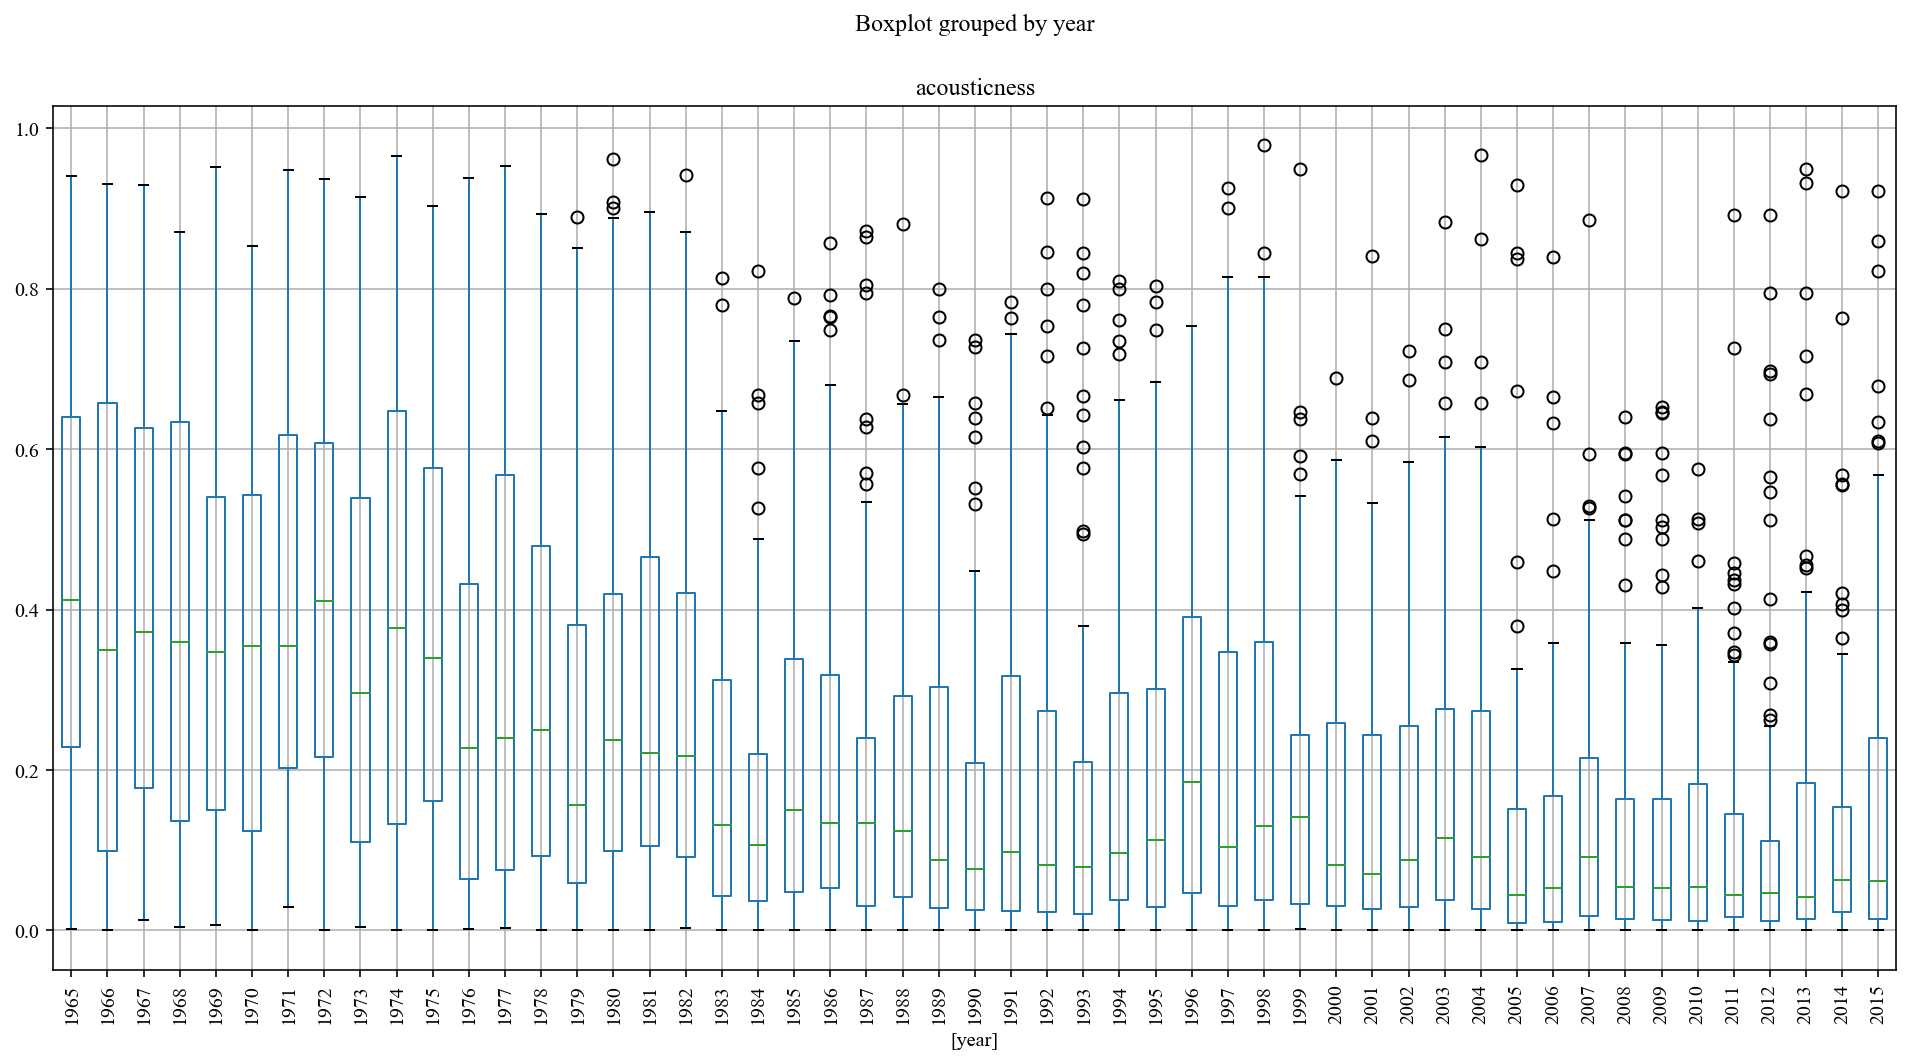

In [130]:
ax = df[['year','acousticness']].boxplot(by='year', figsize=(16,8), rot = 90)

Songs have gotten more energetic over time. No one has time for that slow stuff anymore.

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


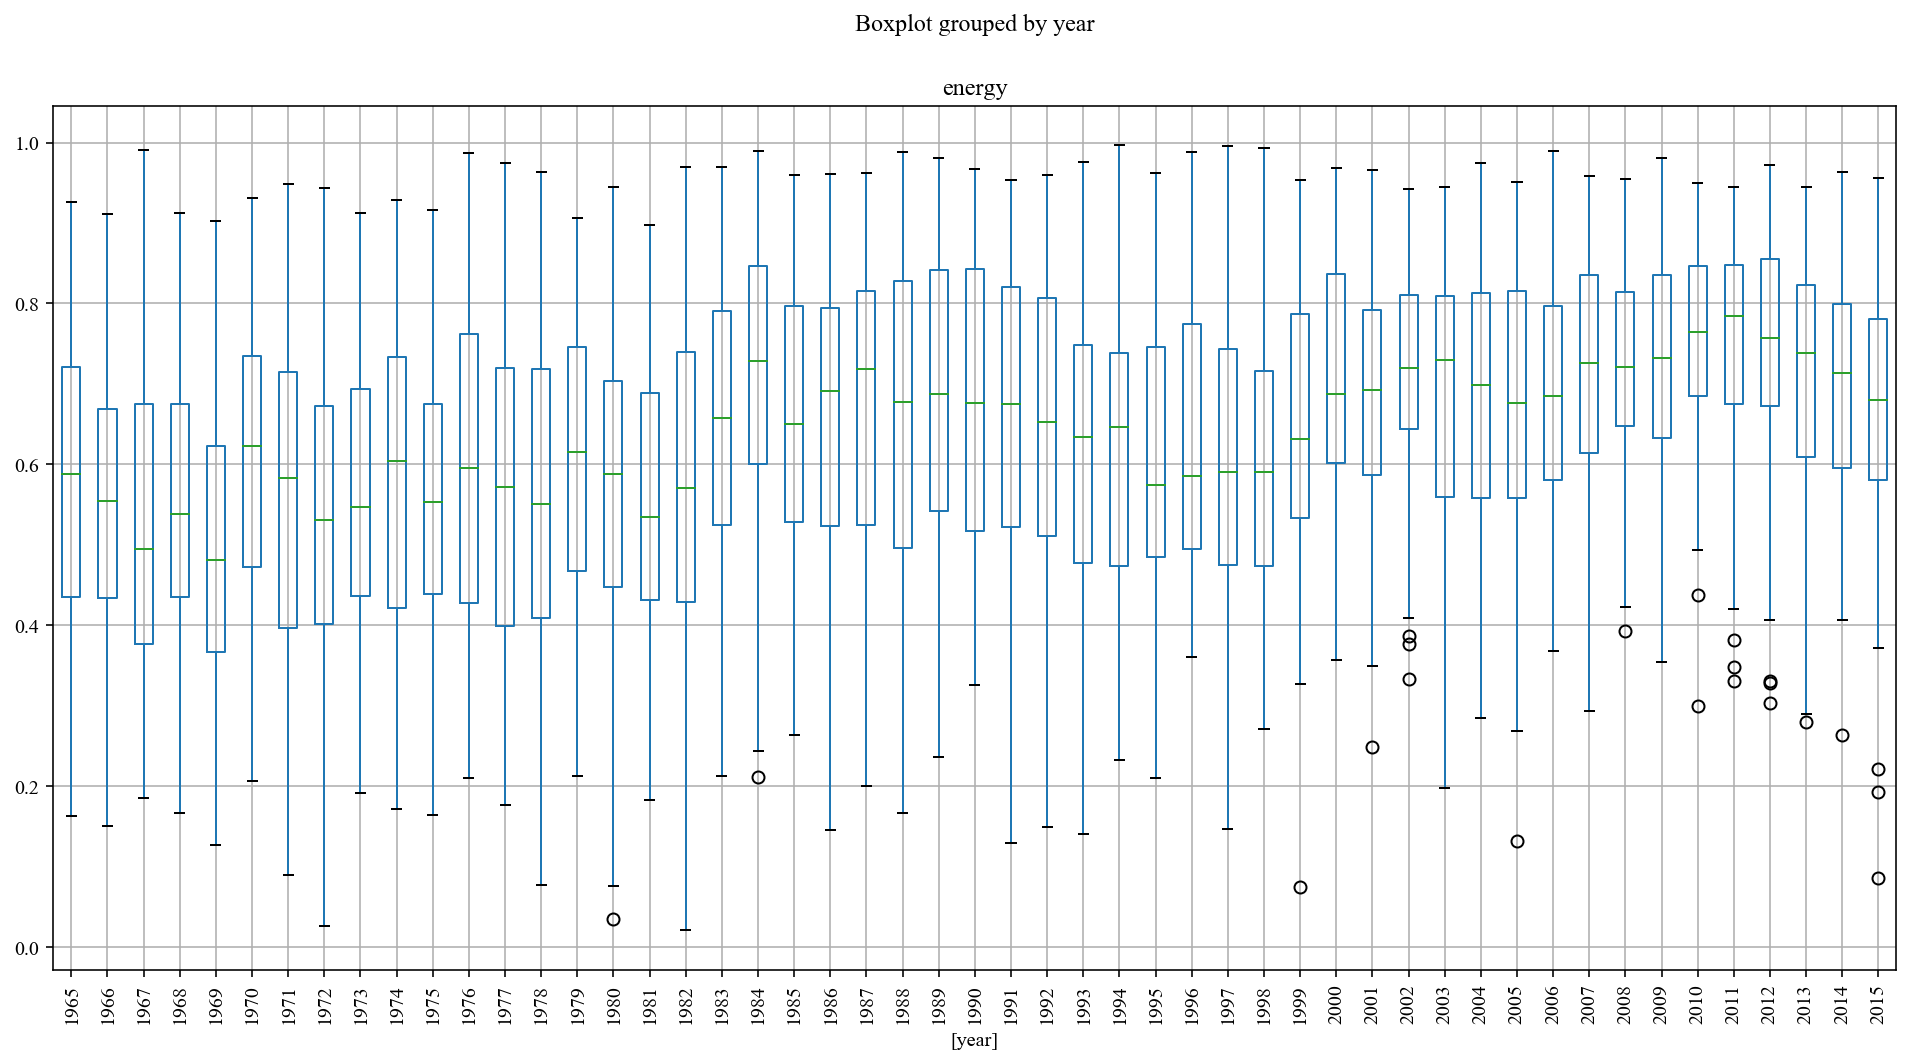

In [131]:
ax = df[['year','energy']].boxplot(by='year', figsize=(16,8), rot = 90)

I guess people danced less from 1965-1975.

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


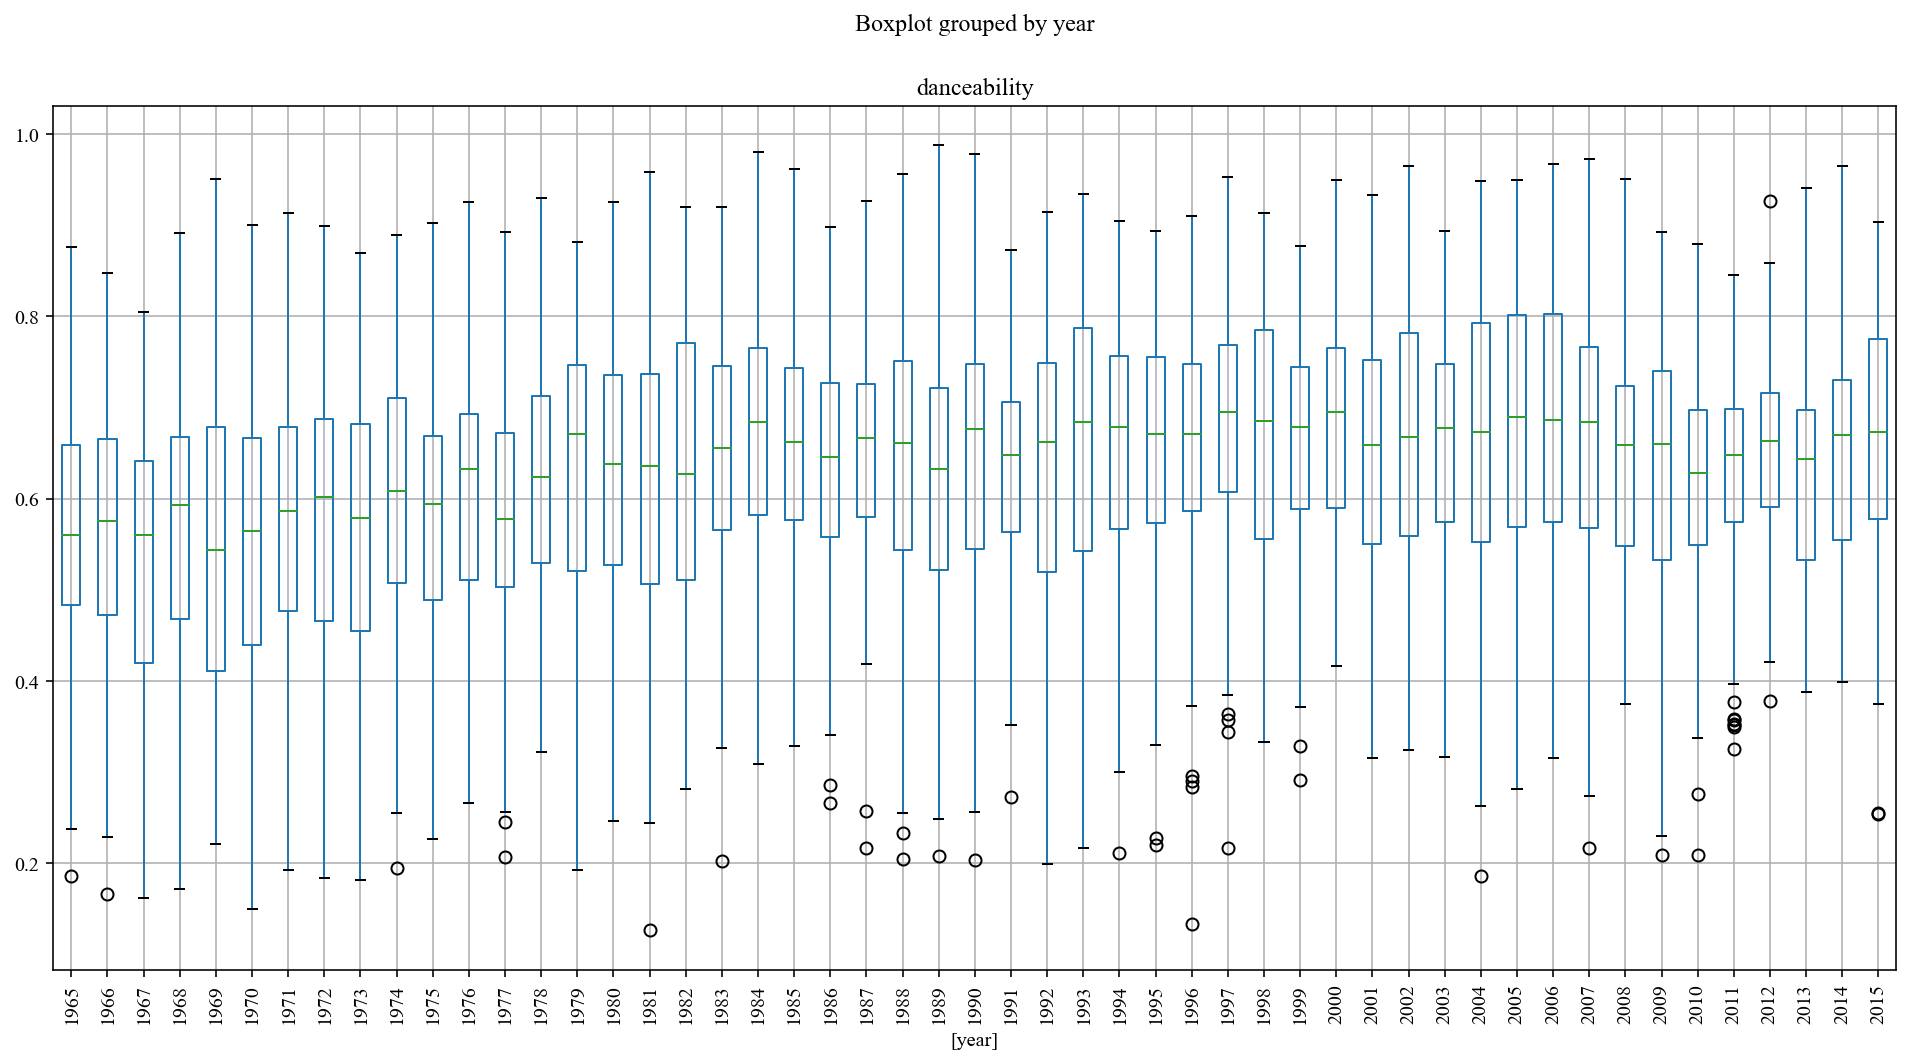

In [133]:
ax = df[['year','danceability']].boxplot(by='year', figsize=(16,8), rot = 90)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


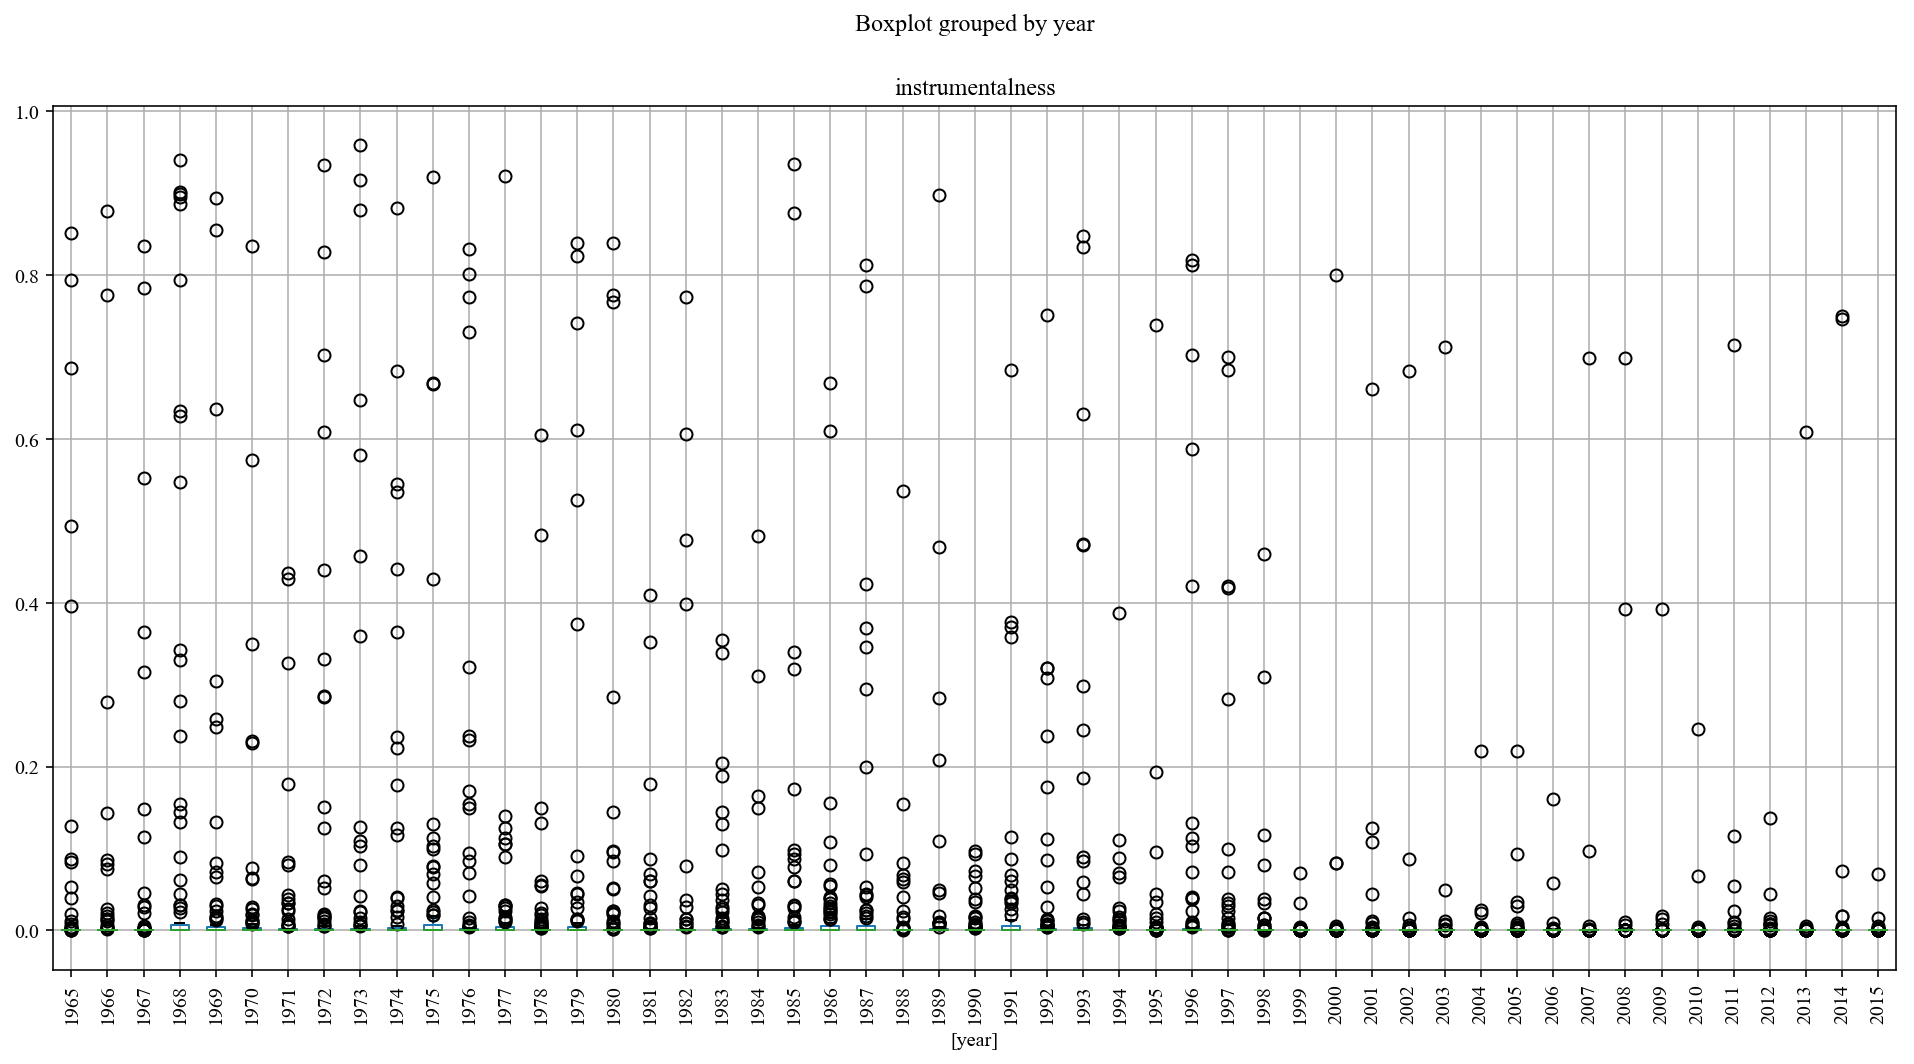

In [134]:
ax = df[['year','instrumentalness']].boxplot(by='year', figsize=(16,8), rot = 90)

Sadly for my tastes, the instrumentalness of songs has been declining over the years. This can be observed both in the plot below and in the decrease of outliers above. This may be due to the fact that songs have also gotten shorter, so there's no more time for instrumental interludes. Everyone just gets to the point.

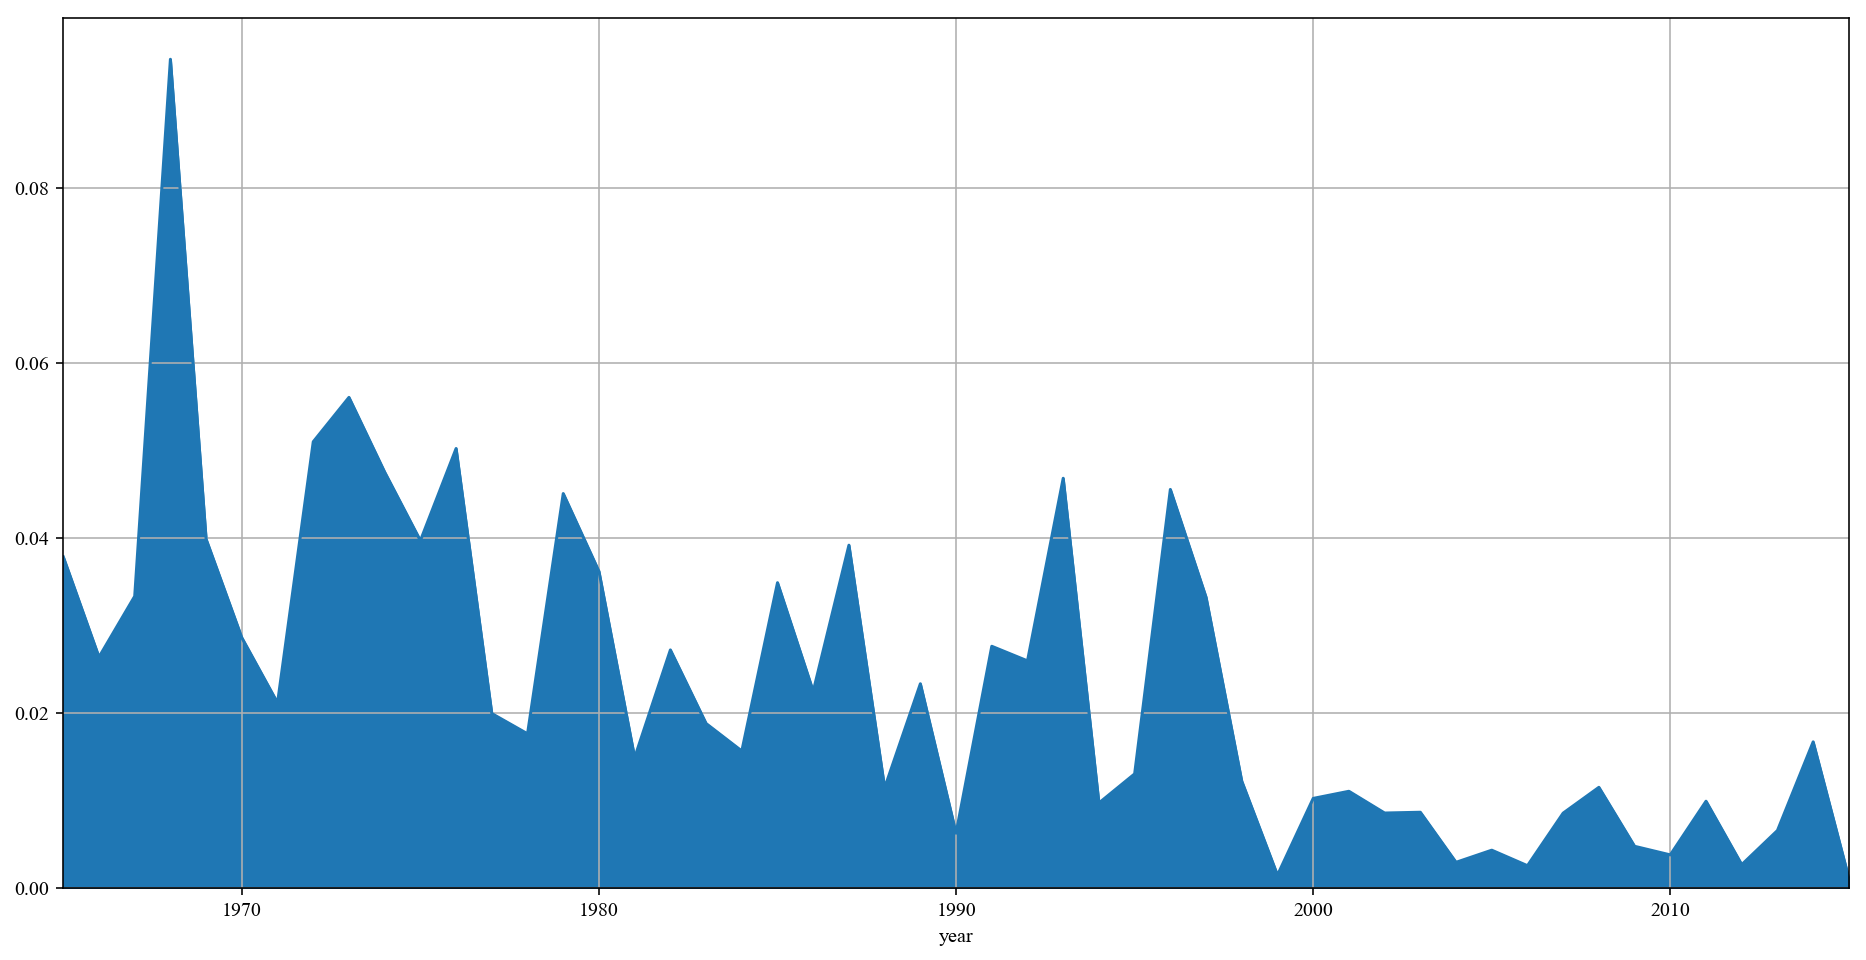

In [141]:
ax = df.groupby(['year'])['instrumentalness'].mean().plot.area(figsize=(16,8), grid=True)

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


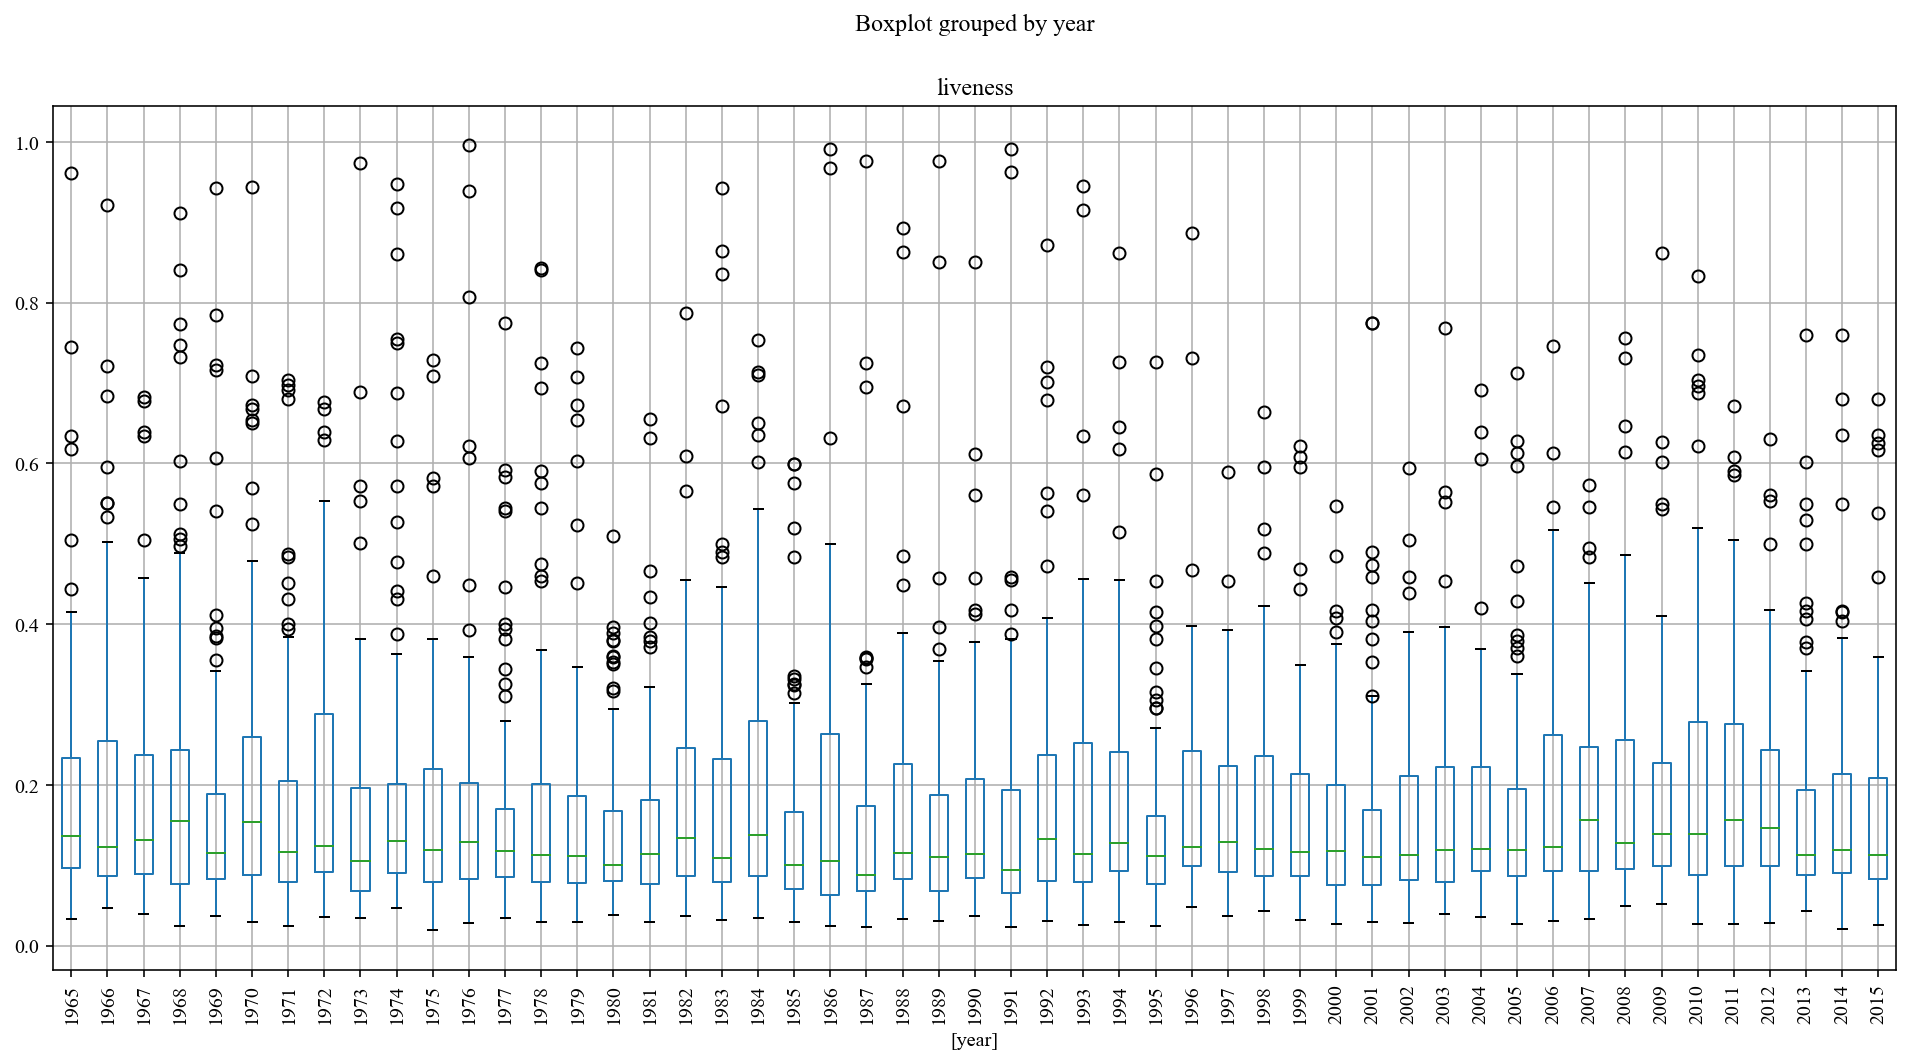

In [135]:
ax = df[['year','liveness']].boxplot(by='year', figsize=(16,8), rot = 90)

The effects of the "loudness wars" where record producers try to one-up each other by making their music louder (through dynamic compression) can be clearly observed. This practice appears to have peaked in 2010 because there's only so far you can squash music before it turns into an instinguishable mass of sound. Also, people might start turning their stereos down, gasp!

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


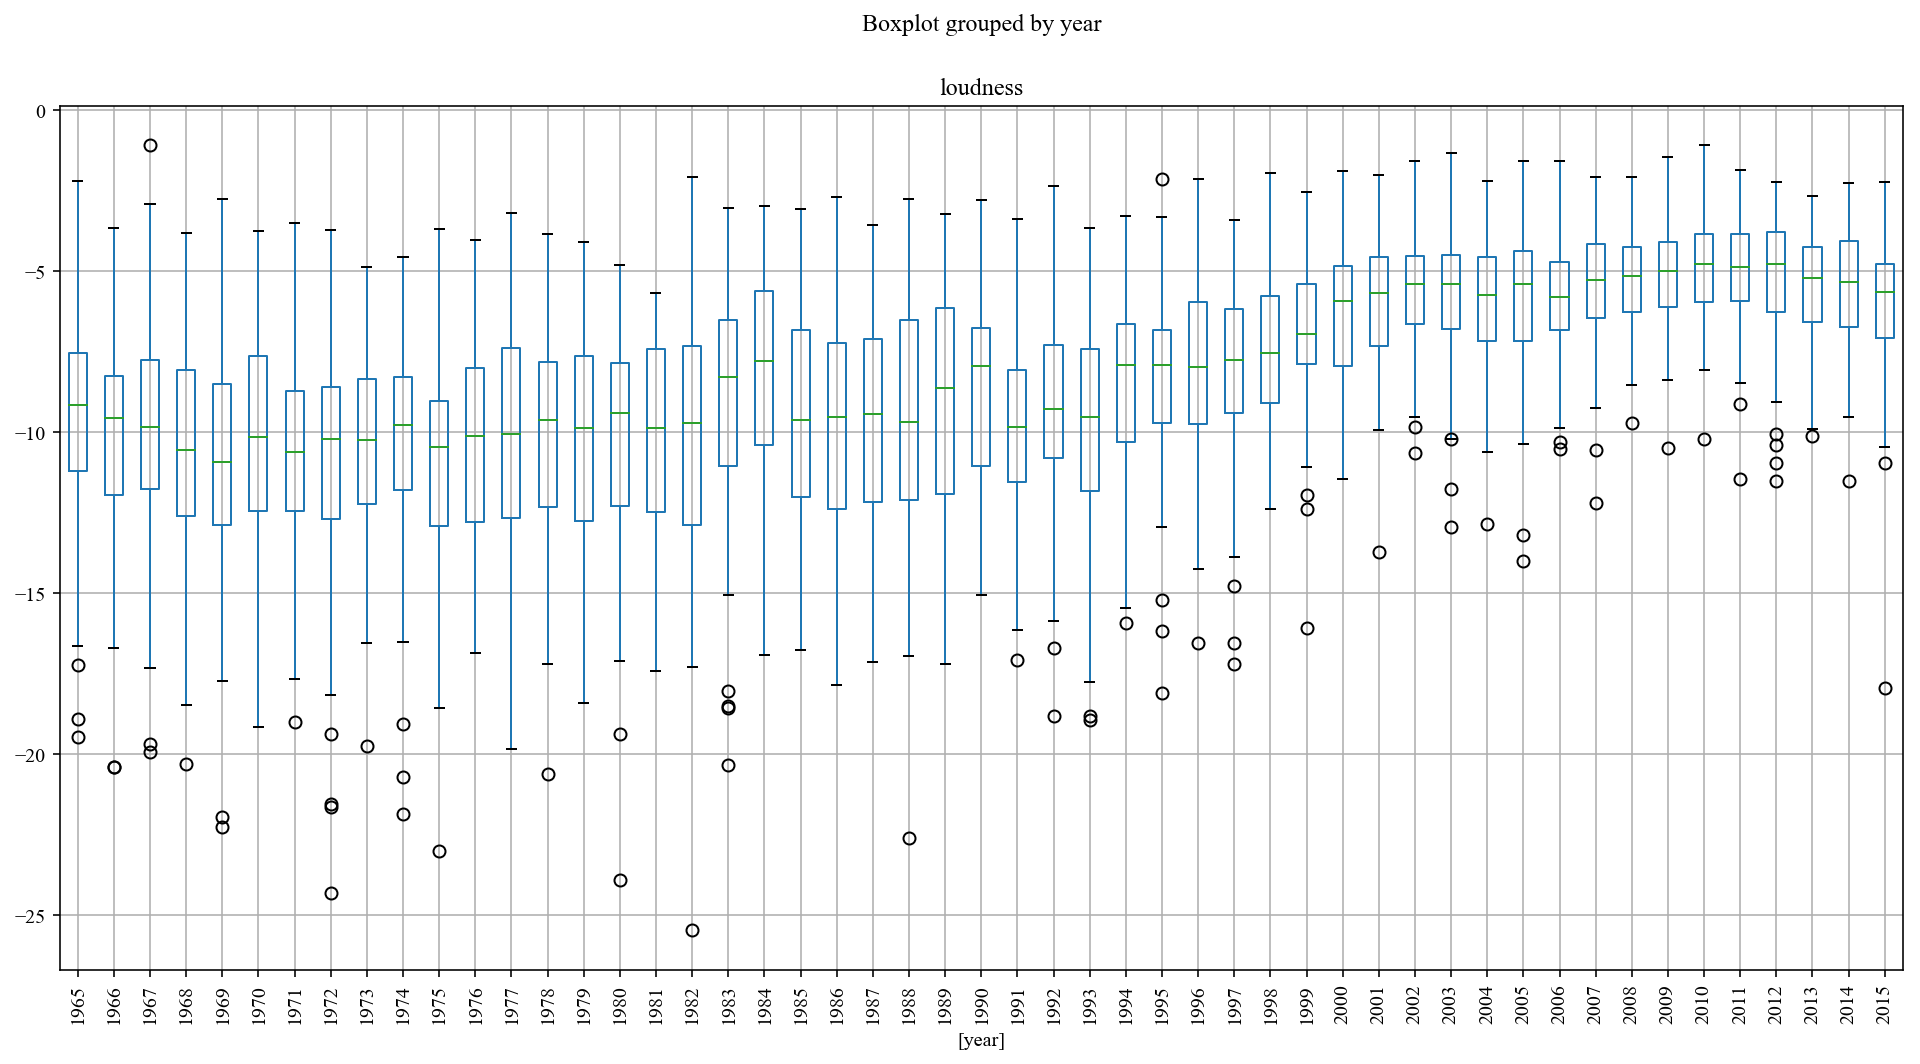

In [136]:
ax = df[['year','loudness']].boxplot(by='year', figsize=(16,8), rot = 90)

Clearly, there was a time when America was indeed great. Can Trump succeed at making America valent again? 

/Users/derekzhao/anaconda3/envs/python-36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


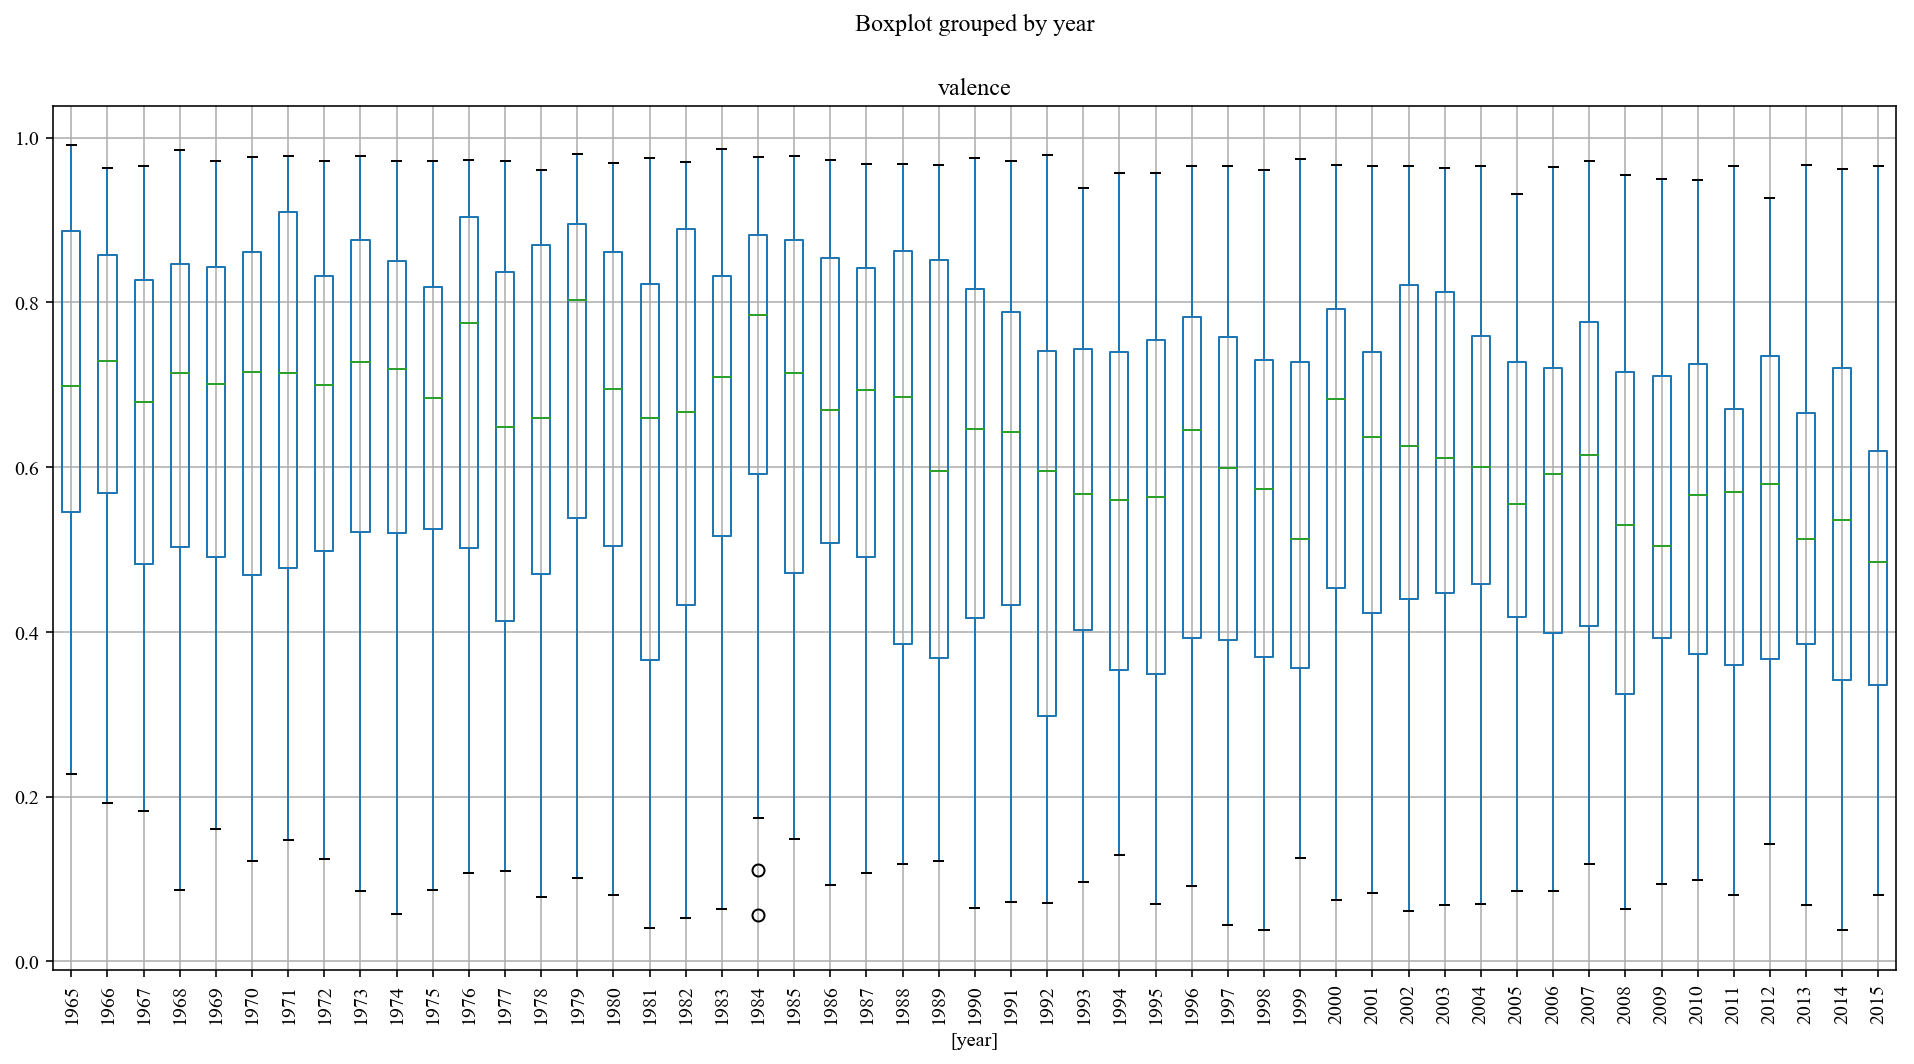

In [137]:
ax = df[['year','valence']].boxplot(by='year', figsize=(16,8), rot = 90)